**Env Preparation**

In [1]:
import pandas as pd
import random as rd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import pymannkendall as mk

#Set Seed
seed = 13

rd.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

**EDA (Exploratory Data Analysis)**

In [2]:
#Load Dataset
dataset_path = "Dataset/fmcg_personalcare/"
marketing_data = pd.read_csv(dataset_path + "marketing.csv")
products_data = pd.read_csv(dataset_path + "products.csv")
reviews_data = pd.read_csv(dataset_path + "reviews.csv")
sales_data = pd.read_csv(dataset_path + "sales.csv")

In [3]:
def data_information(data, name):
    print(name)
    print("=" * 40, '\n')
    print("Data Preview \n")
    print(data.head())
    print("=" * 40, '\n')
    print("Data Info \n")
    print(data.info())
    print("=" * 40, '\n')
    print("Data Description \n")
    print(data.describe())
    print("=" * 40, '\n')
    print("Data Size : ")
    print(data.shape)

In [4]:
data_information(marketing_data, "Marketing Data")

Marketing Data

Data Preview 

  campaign_id product_id     campaign_name  start_date    end_date  \
0      MKT001      PC010  Campaign_1_PC010  2020-10-12  2020-12-14   
1      MKT002      PC008  Campaign_2_PC008  2020-06-30  2020-08-29   
2      MKT003      PC006  Campaign_3_PC006  2021-09-01  2021-09-22   
3      MKT004      PC015  Campaign_4_PC015  2025-04-23  2025-07-04   
4      MKT005      PC003  Campaign_5_PC003  2021-07-15  2021-09-08   

    spend_idr     channel  engagement_rate  
0   256411579          TV            0.566  
1   582461991          TV            0.376  
2   884233026          TV            0.117  
3  1139498941  Influencer            0.560  
4   340924224   Billboard            0.091  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 

In [5]:
data_information(products_data, "Product")

Product

Data Preview 

  product_id                           product_name     brand         type  \
0      PC001   Sunsilk Smooth & Shine Shampoo 340ml   Sunsilk      Shampoo   
1      PC002  Sunsilk Black Shine Conditioner 340ml   Sunsilk  Conditioner   
2      PC003       Lifebuoy Total10 Body Wash 400ml  Lifebuoy    Body Wash   
3      PC004      Lifebuoy Mild Care Handwash 200ml  Lifebuoy     Handwash   
4      PC005        Dove Deep Moisture Lotion 200ml      Dove       Lotion   

   size_ml  base_price launch_date  
0      340       32000  2020-02-15  
1      340       33000  2020-06-10  
2      400       28000  2020-03-20  
3      200       25000  2021-05-01  
4      200       35000  2021-11-12  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    15 non-null     object
 1   product_name  15 non-null     object
 2

In [6]:
data_information(reviews_data, "Reviews")

Reviews

Data Preview 

  review_id product_id        date  rating sentiment   platform  \
0   R100000      PC014  2024-10-16     4.6  Positive  Instagram   
1   R100001      PC012  2023-06-27     2.8  Negative  Instagram   
2   R100002      PC003  2022-10-21     3.2   Neutral     Shopee   
3   R100003      PC010  2025-03-07     2.0  Negative  Tokopedia   
4   R100004      PC015  2022-03-03     1.5  Negative     Shopee   

                                        comment  
0   Packaging bocor saat diterima, kurang aman.  
1     Mudah dibeli saat promo, value for money.  
2     Mudah dibeli saat promo, value for money.  
3     Mudah dibeli saat promo, value for money.  
4  Memberikan hasil sesuai klaim after 2 weeks.  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   10000 non-null  object 
 1   product_id  10000 non-nul

In [7]:
data_information(sales_data, "Sales")

Sales

Data Preview 

                         transaction_id        date product_id     region  \
0  fa43024c-7c61-4e2b-bfd1-84915e86c4f7  2024-02-04      PC001   Semarang   
1  cc02b941-61b7-4e37-b385-ecfc2fe2a0b0  2022-05-31      PC004      Medan   
2  378b66ac-8b18-43e3-8b91-cfbb0ee1d346  2020-10-24      PC013  Palembang   
3  42ff9d7e-aba8-4444-b144-3ed288c3ae2c  2023-05-31      PC001      Medan   
4  605dfc68-c347-406e-b6af-2bb43cabc515  2024-05-06      PC009      Medan   

     channel  units_sold  avg_price  discount_pct    revenue  \
0     Shopee           4   31721.61             5  126886.45   
1  Tokopedia           4   23148.20             0   92592.80   
2   Alfamart           5   25396.69            20  126983.43   
3  Tokopedia           7   30006.83             0  210047.84   
4  Tokopedia           2   30927.25             5   61854.50   

   days_since_launch  
0               1450  
1                395  
2              -1178  
3               1201  
4              

# Innovation Radar
Mengidentifikasi produk dengan potensi pertumbuhan tinggi atau inovasi yang menarik minat konsumen.

### Metode dan Pendekatan Analisis
Data penjualan dikaji secara kuartalan untuk semua produk. Pendekatan yang digunakan mencakup Mann Kendall Tes untuk analisis tren dan juga matriks posisi produk berdasarkan indeks stabilitas dan pertumbuhan rata-rata.

Mann Kendall Tes dipakai karena tidak mengasumsikan distribusi normal pada data penjualan sehingga cocok untuk data penjualan yang distribusinya belum diketahui.

Indeks stabilitas dan pertumbuhan rata - rata dipakai untuk mengukur konsistensi penjualan antar kuartal suatu produk dan juga mengukur performa penjualan

Indeks stabilitas dihitung dengan cara **membagi rata-rata penjualan dengan standar deviasi**:

$$\text{Dominance Index} = \frac{\mu}{\sigma} = \frac{\text{Mean(units\_sold)}}{\text{Std(units\_sold)}}$$

Growth rate dihitung dengan cara **menghitung persentase perubahan quarter-over-quarter, kemudian dirata-ratakan**:

$$\text{Growth Rate} = \frac{1}{n-1} \sum_{i=2}^{n} \frac{Q_i - Q_{i-1}}{Q_{i-1}}$$

Di mana:
- $Q_i$ = penjualan pada quarter ke-i
- $n$ = jumlah total quarter

### Deskripsi Grafik
Kode di bawah ini merupakan kode yang menghasilkan grafik pergerakan jumlah penjualan per kuartil dan juga sebagai gambaran bagaimana
marketing mempengaruhi jumlah penjualan (garis merah menandai awal periode marketing).

Dari grafik yang dihasilkan dapat dilihat bahwa beberapa marketing tidak selalu mendorong kenaikan penjualan, ada beberapa produk
yang telah dilakukan marketing namun penjualan malah menurun dan juga dari grafik terlihat bahwa sebagian besar produk tidak memiliki 
tren yang jelas dan hanya berfluktuasi yang dapat dilihat dengan bantuan garis regresi berwarna merah, namun PC007 tampak memiliki pola positif yang lebih stabil dibanding produk yang lain dengan nilai $R^{2} = 0.143$ dan paling tertinggi diantara yang lain.

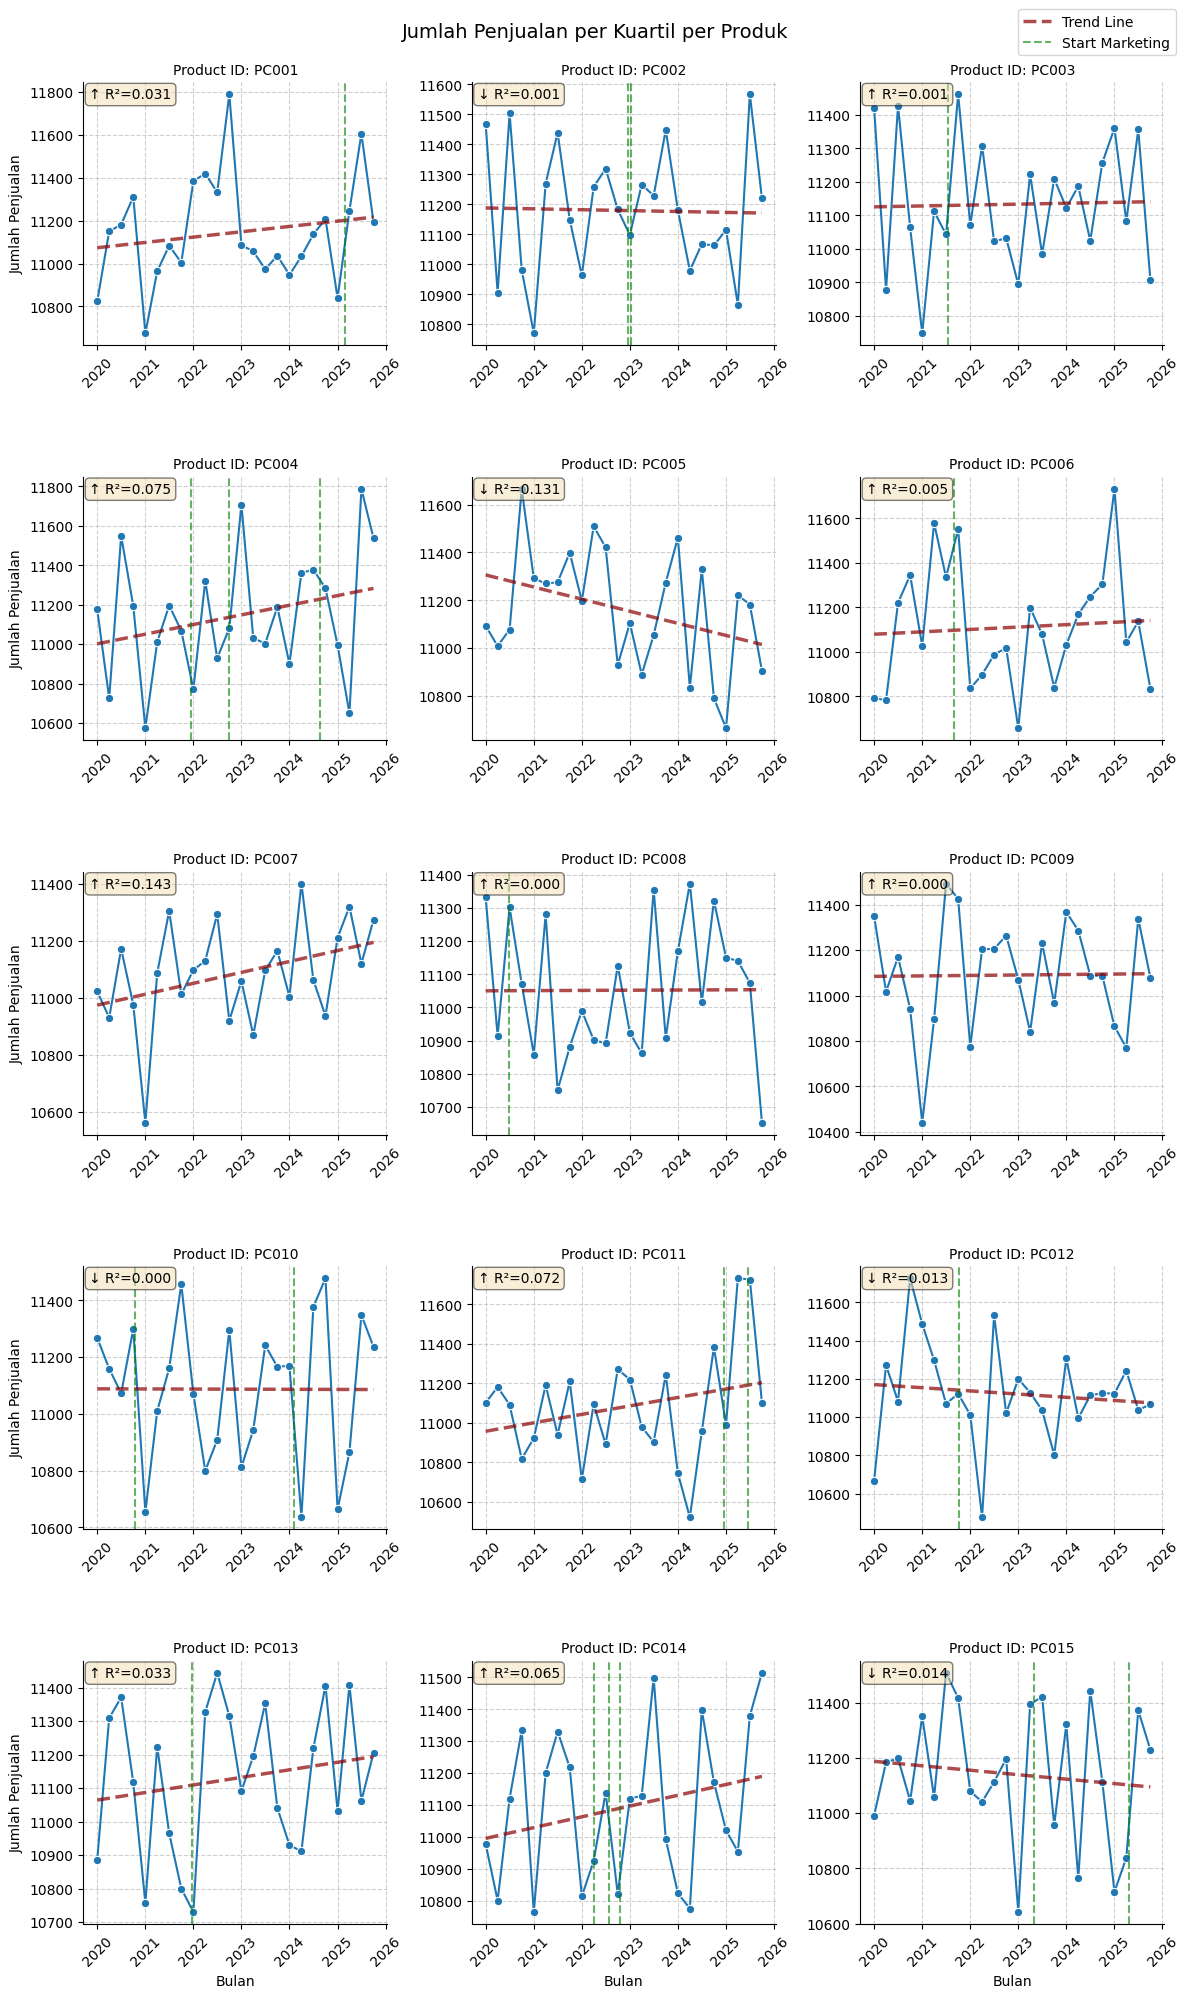

In [8]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['month'] = sales_data['date'].dt.to_period('Q')

sales_sum = sales_data.groupby(['product_id','month'])['units_sold'].sum().reset_index()
sales_sum['month'] = sales_sum['month'].dt.to_timestamp()

campaign_date = marketing_data.groupby(['product_id'])['start_date'].unique()

g = sns.FacetGrid(sales_sum, col='product_id', col_wrap=3, height=4, sharey=False, sharex=False)
g.map_dataframe(sns.lineplot, x='month', y='units_sold', marker='o')

g.set_titles(col_template="Product ID: {col_name}")
g.set_axis_labels("Bulan", "Jumlah Penjualan")

for ax, product in zip(g.axes.flatten(), g.col_names):
    product_data = sales_sum[sales_sum['product_id'] == product].sort_values('month')
    
    if len(product_data) > 0:
        x_dates = product_data['month'].values
        x_numeric = np.arange(len(x_dates))
        y = product_data['units_sold'].values
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, y)
        line = slope * x_numeric + intercept

        ax.plot(x_dates, line, '--', linewidth=2.5, color='darkred', alpha=0.7, label='Trend Line')
        
        trend_direction = "↑" if slope > 0 else "↓" if slope < 0 else "→"
        ax.text(0.02, 0.98, f'{trend_direction} R²={r_value**2:.3f}', 
                transform=ax.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    if product in campaign_date.index:
        dates = pd.to_datetime(campaign_date.loc[product])
        for tanggal in dates:
            ax.axvline(tanggal, color='green', linestyle='--', linewidth=1.5, alpha=0.6, label='Start Marketing')
    
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.95, hspace=0.5)
g.fig.suptitle("Jumlah Penjualan per Kuartil per Produk", fontsize=14)

handles, labels = g.axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
g.fig.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.show()

Kode di bawah ini menghasilkan grafik batang persentase perubahan penjualan unit produk dari awal penjualan hingga akhir penjualan,
dari grafik, PC014 memiliki peningkatan tertinggi dengan persentase > 4% dibanding awal penjualan, sementara PC008 memiliki penurunan
terendah dengan persentase > 6%

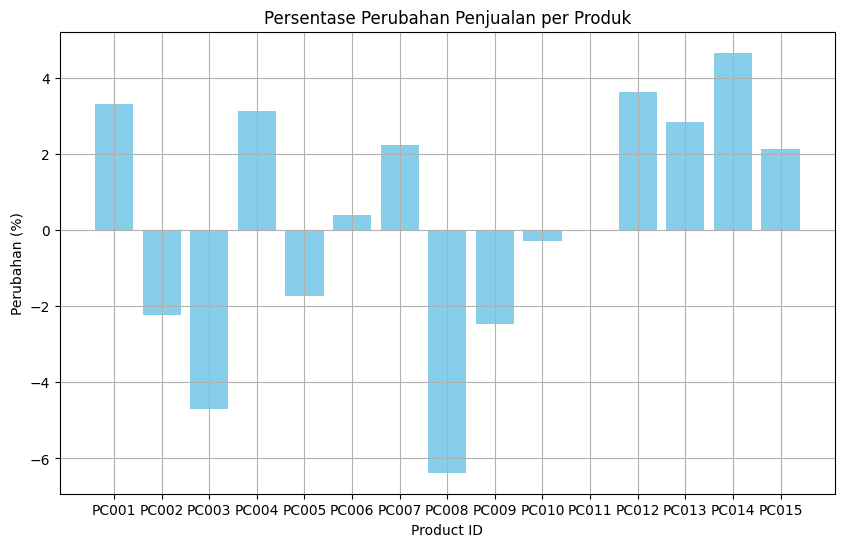

In [9]:
from datetime import datetime

product_sold_percentage = []

sold_percentage = sales_sum[
    (sales_sum['month'] == datetime(2020, 1, 1)) |
    (sales_sum['month'] == datetime(2025, 10, 1))
].reset_index(drop=True)

product_id = np.unique(sold_percentage['product_id'])

for i in range(1 , len(sold_percentage), 2):
    tmp = ((sold_percentage['units_sold'].iloc[i] - sold_percentage['units_sold'].iloc[i-1]) / sold_percentage['units_sold'].iloc[i]) * 100
    product_sold_percentage.append(tmp)

plt.figure(figsize=(10, 6))
plt.bar(product_id, product_sold_percentage, color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Perubahan (%)")
plt.title("Persentase Perubahan Penjualan per Produk")
plt.show()

Kode di bawah ini menampilkan grafik jumlah kontribusi revenue setiap produk dimana 3 peringkat teratas adalah PC010, PC007 dan PC014

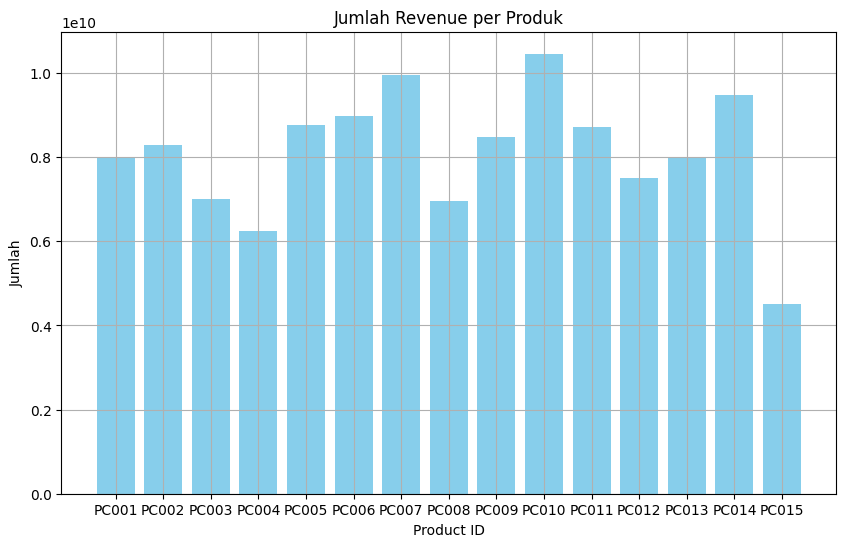

In [10]:
revenue_sum = sales_data.groupby(['product_id'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(product_id, revenue_sum['revenue'], color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Jumlah")
plt.title("Jumlah Revenue per Produk")
plt.show()

Kode di bawah ini menampilkan grafik jumlah permintaan barang dimana secara keseluruhan semua produk memiliki jumlah permintaan yang relatif sama sehingga analisis dapat difokuskan pada kecenderungan dan kestabilan tren saja.

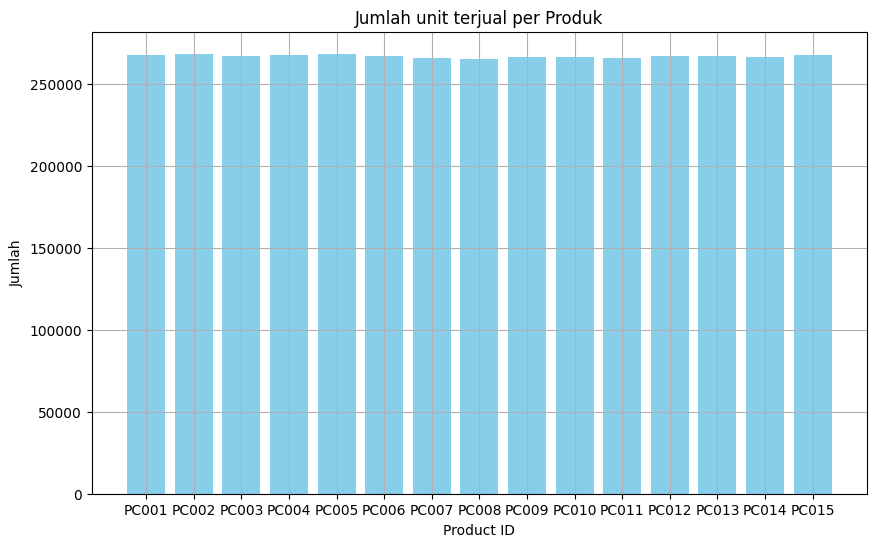

In [11]:
unit_sold_sum = sales_data.groupby(['product_id'])['units_sold'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(product_id, unit_sold_sum['units_sold'], color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Jumlah")
plt.title("Jumlah unit terjual per Produk")
plt.show()

In [12]:
unit_sold_region = sales_data.groupby(['product_id','region','month'])['units_sold'].sum()

Untuk memperjelas sumber penjualan tiap produk, dibawah disajikan grafik penjualan setiap produk di seluruh region yang ada
Dari grafik yang dihasilkan ada beberapa produk yang sebenarnya memiliki performa yang baik di sebagian besar region namun buruk 
di salah satunya seperti produk PC001, PC004, PC007, PC011, PC013, PC014.

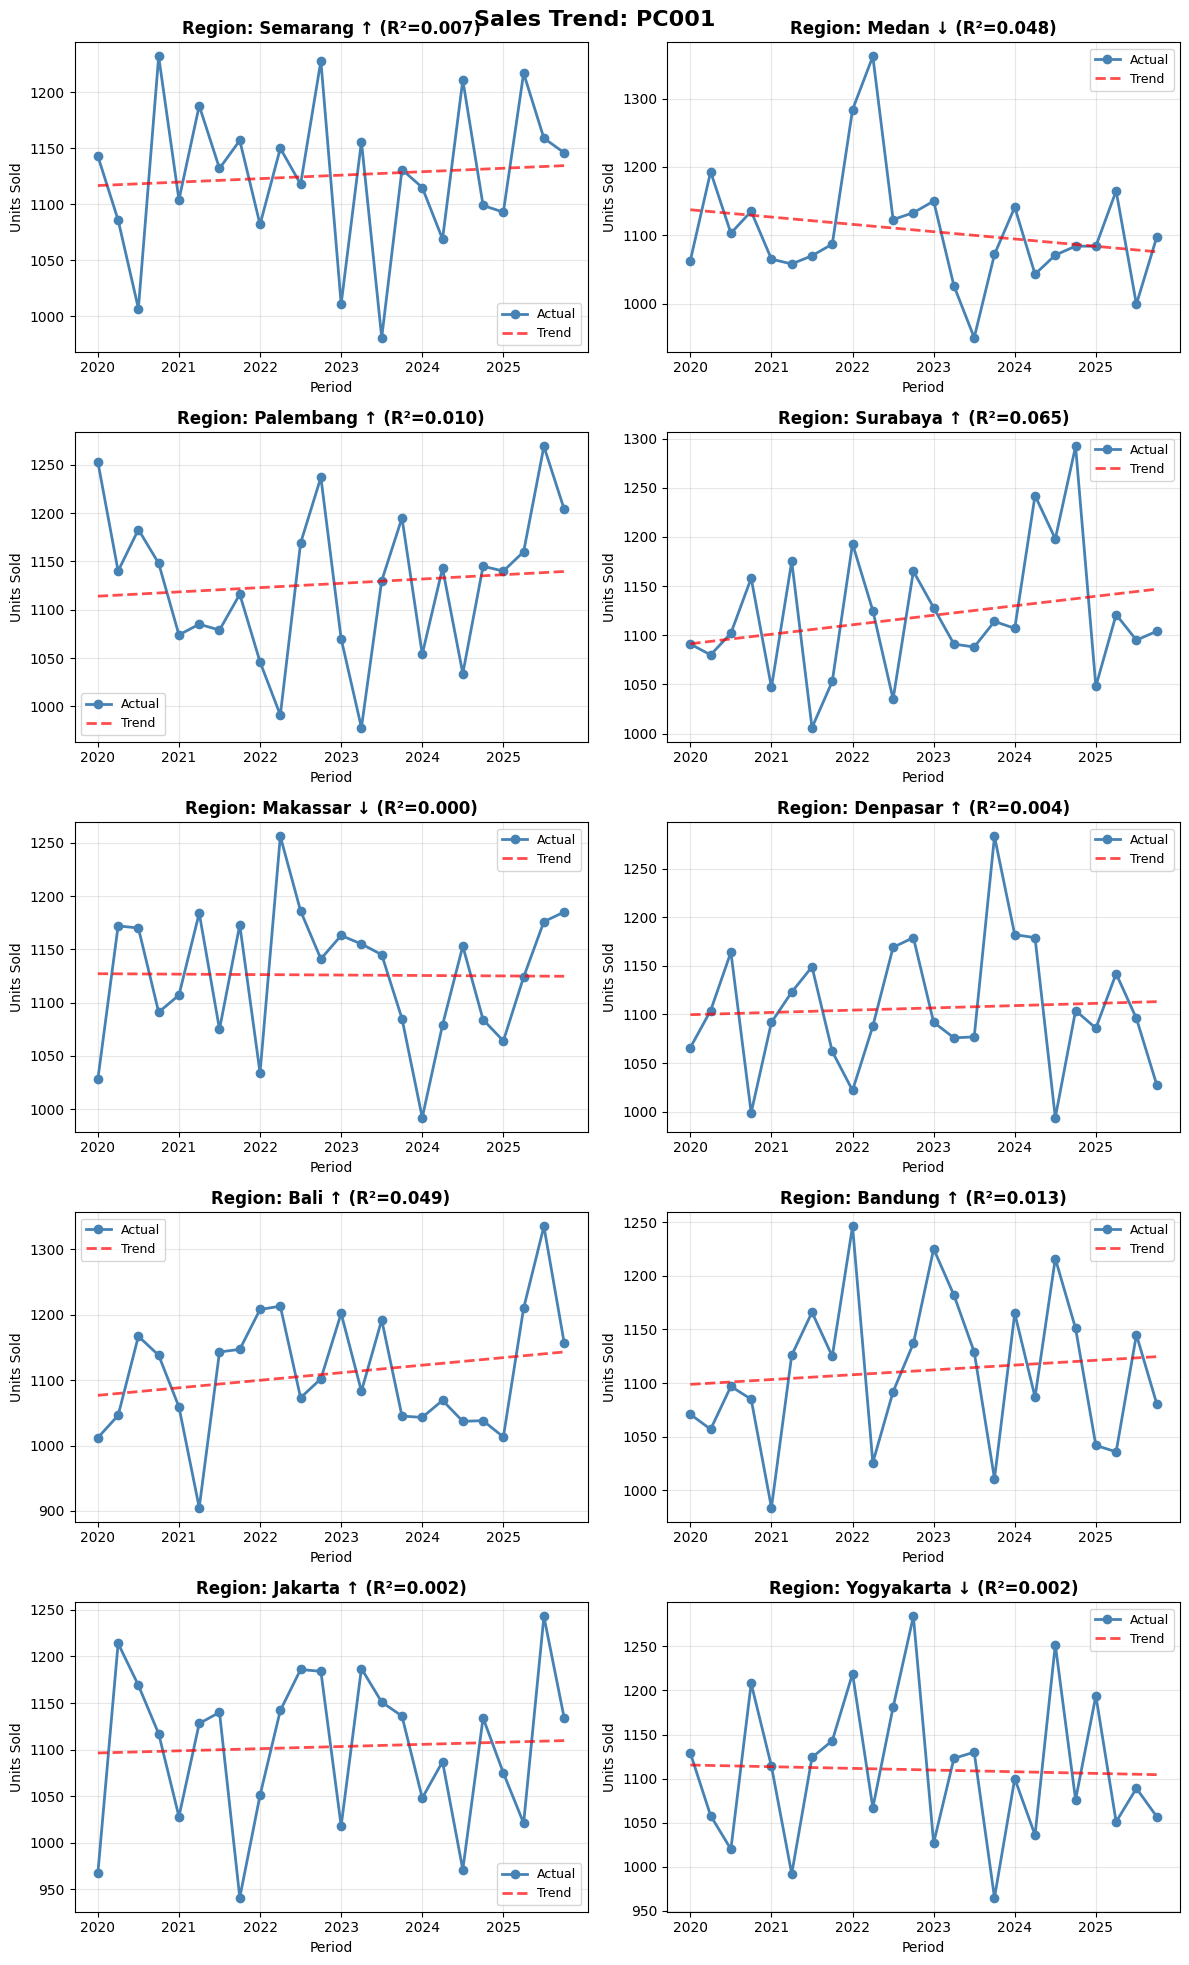

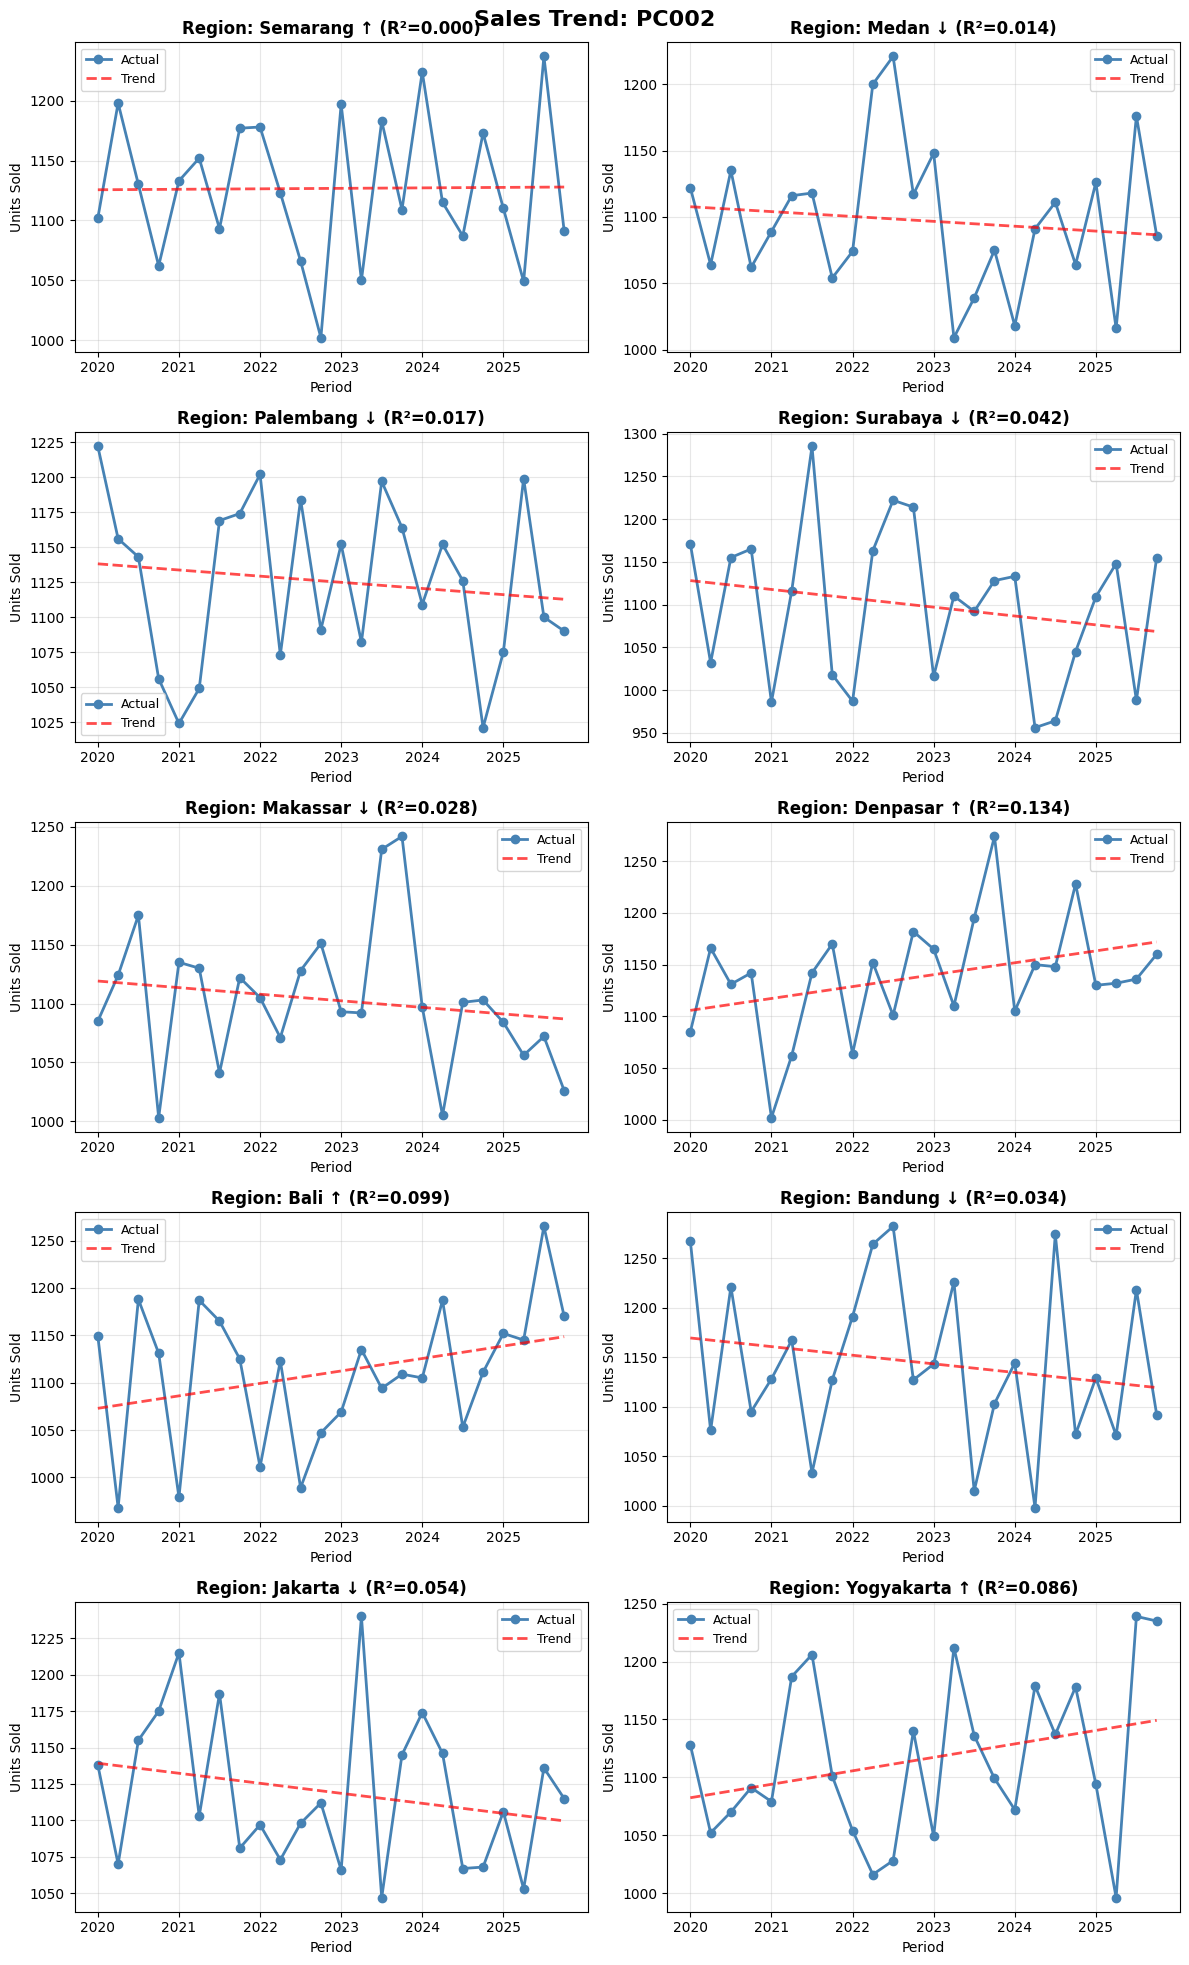

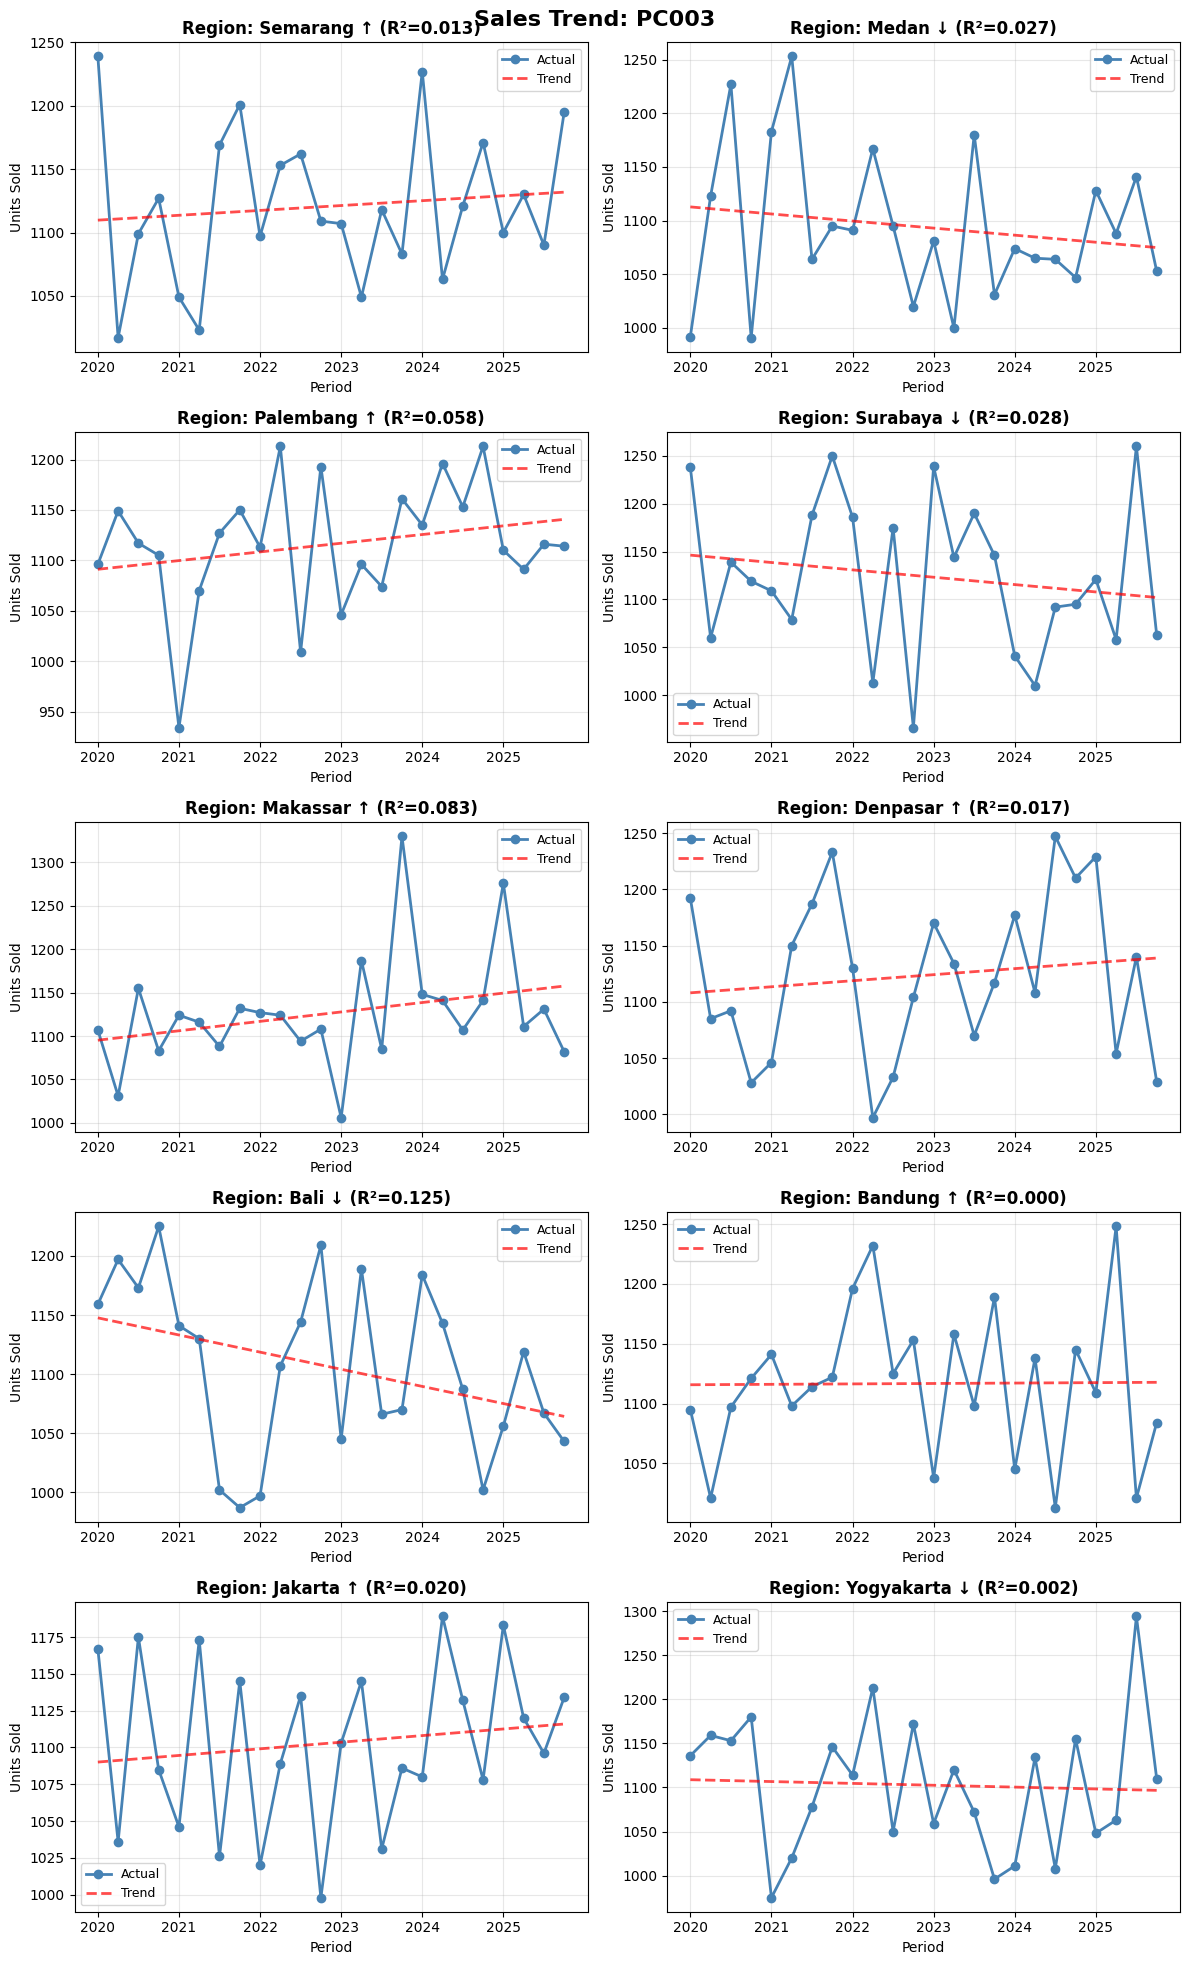

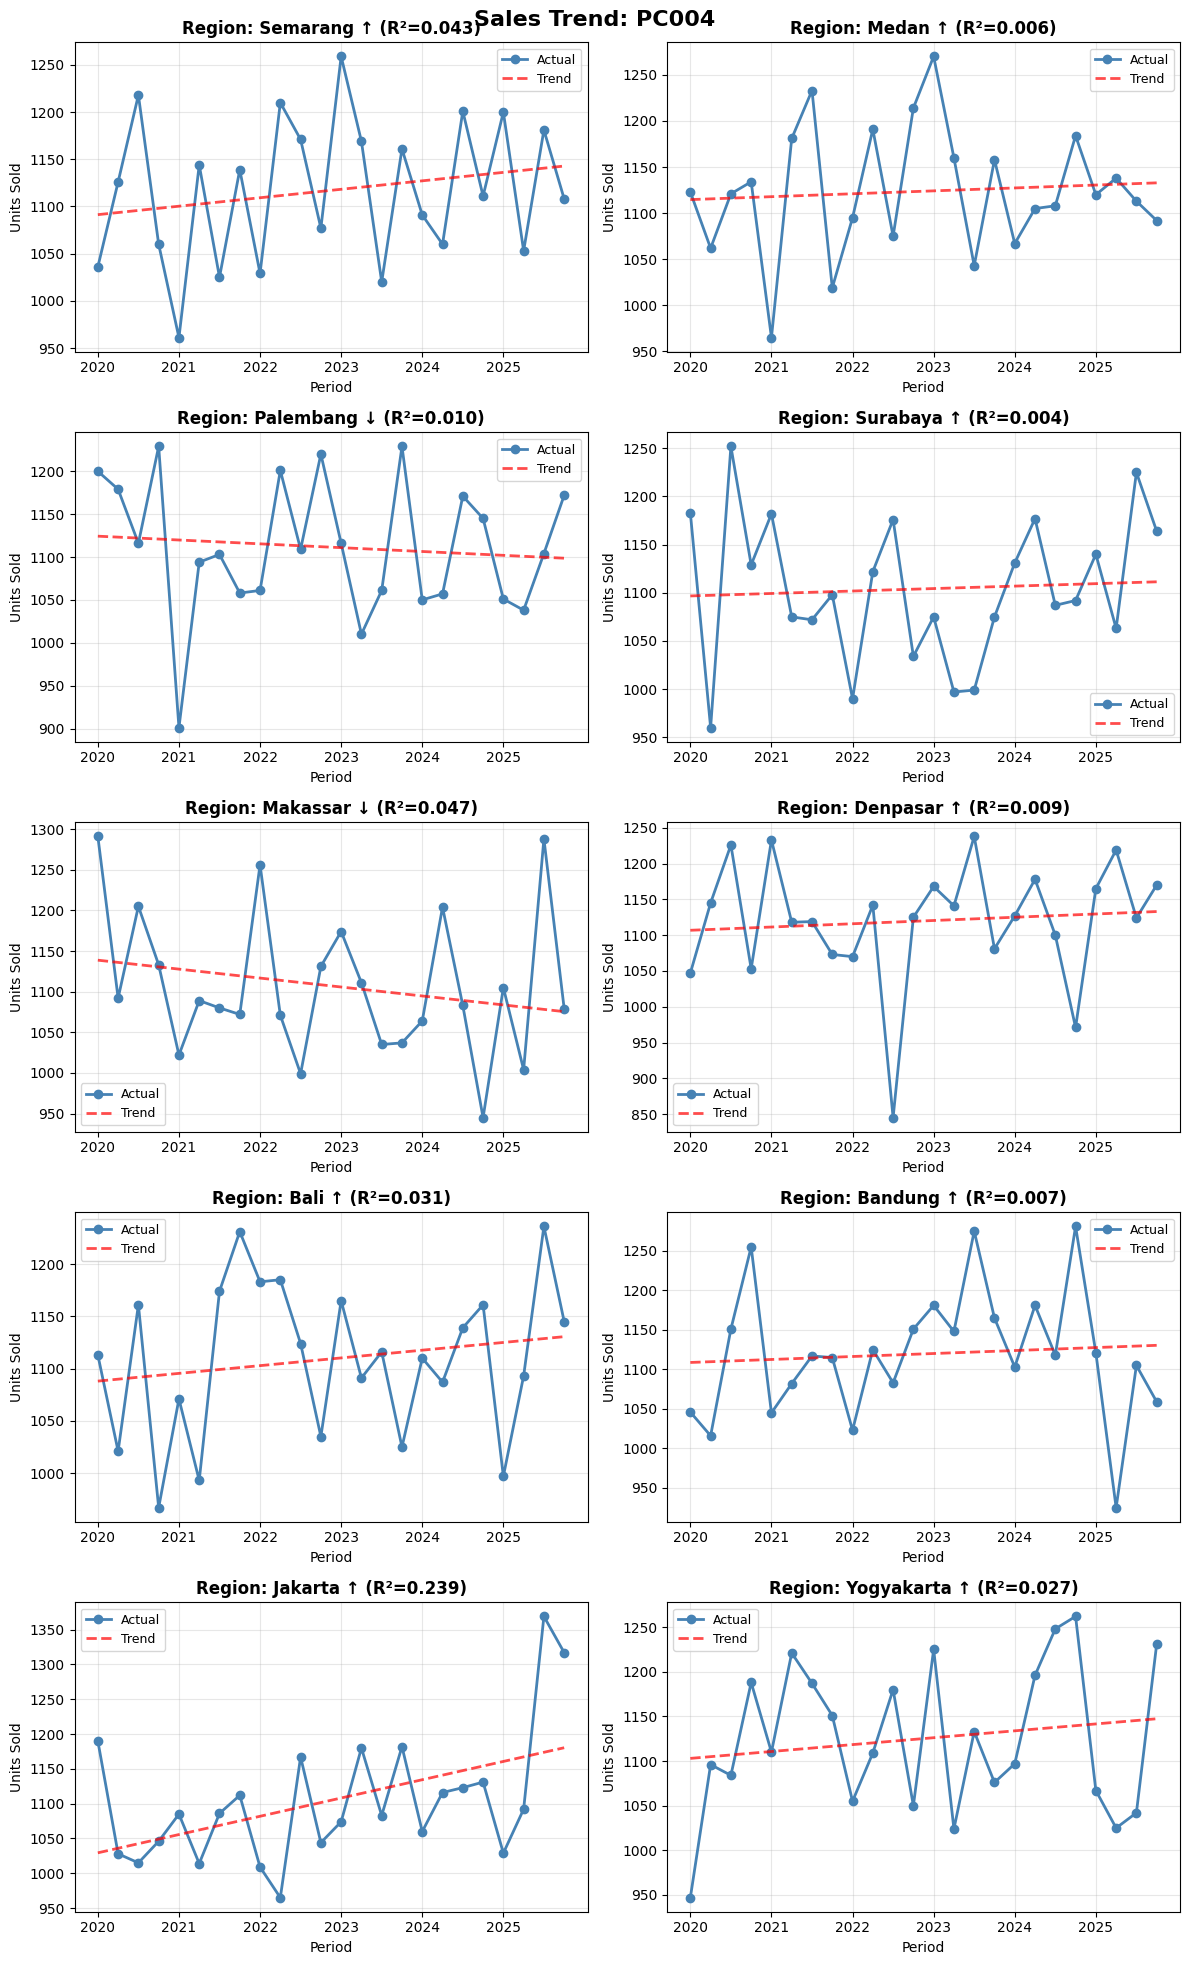

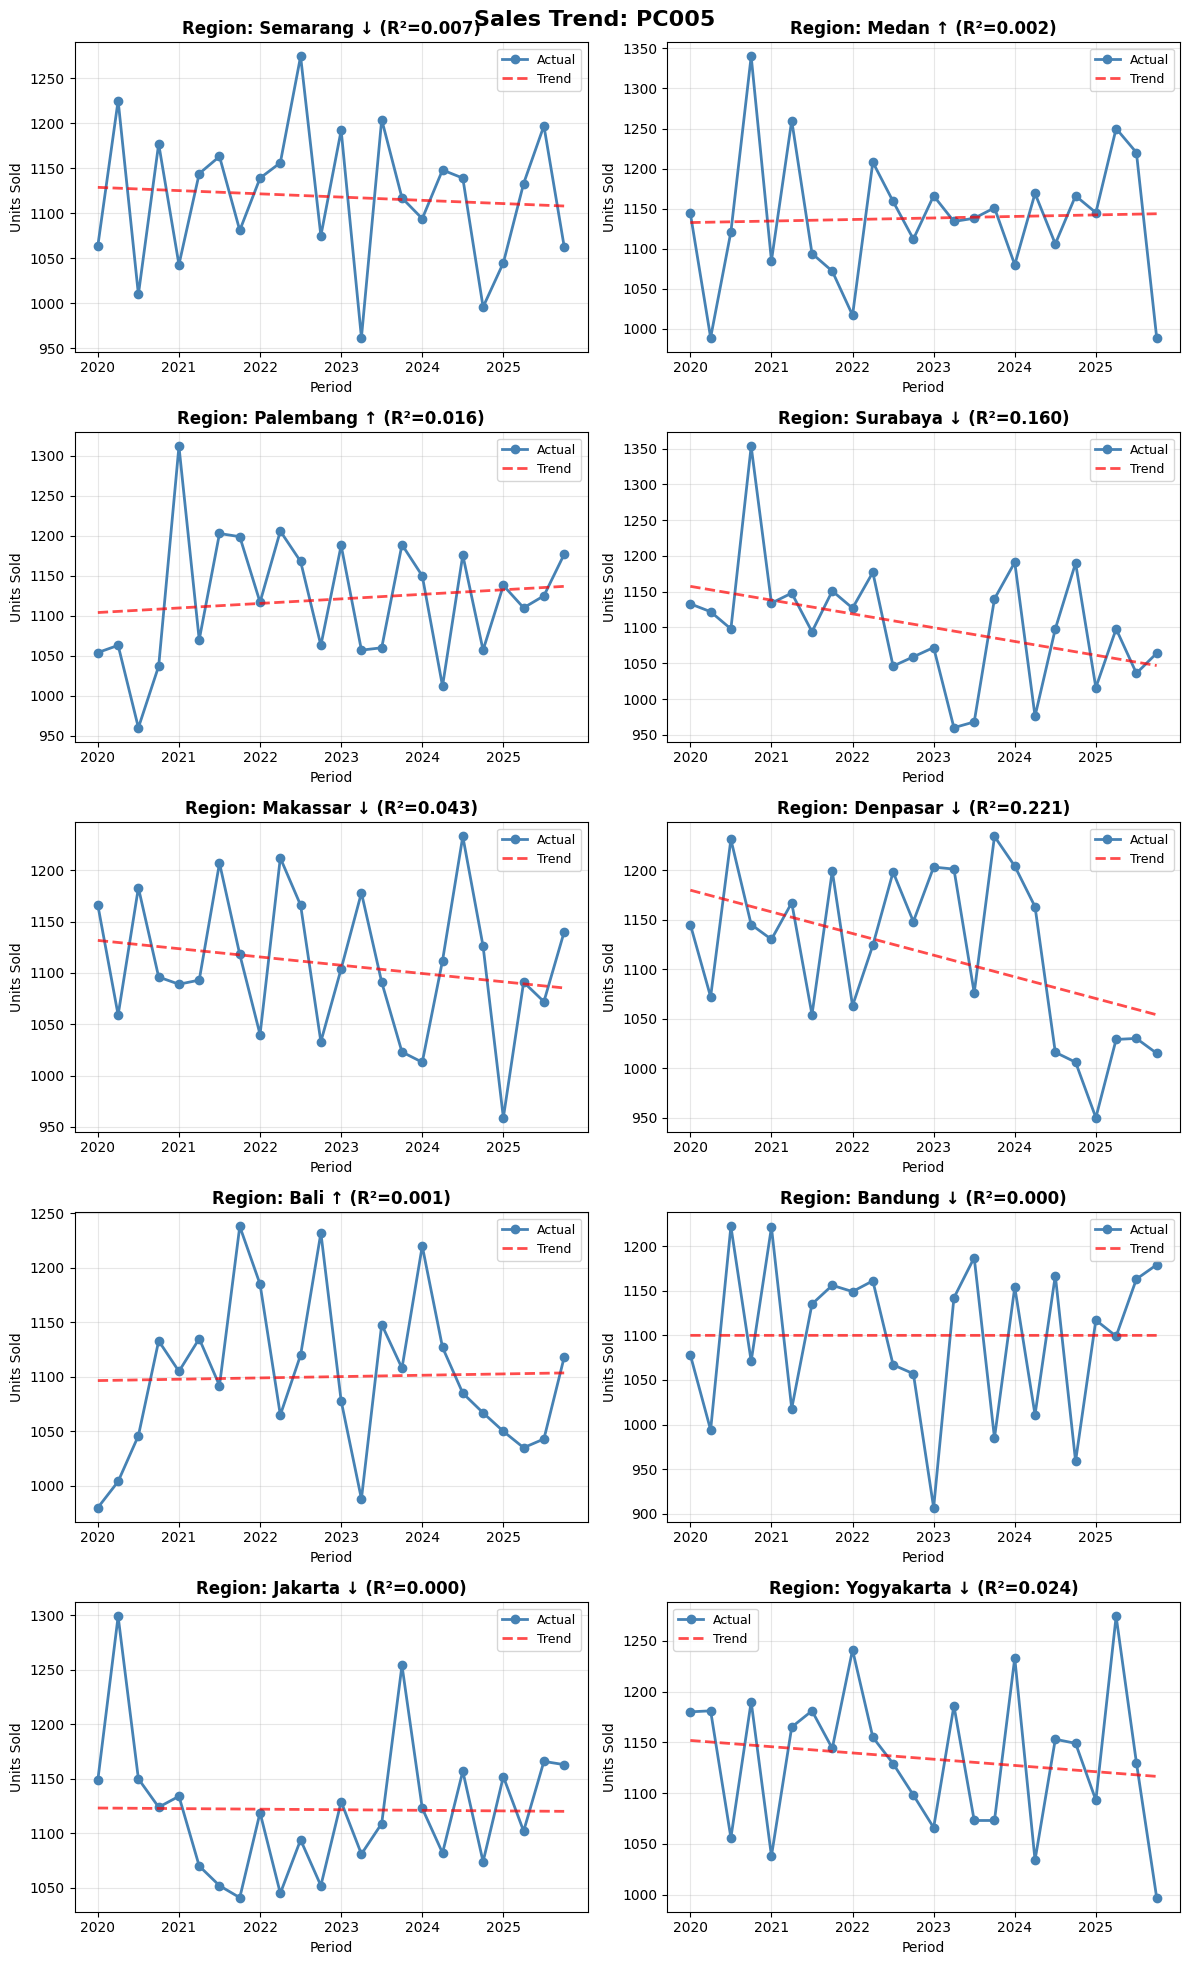

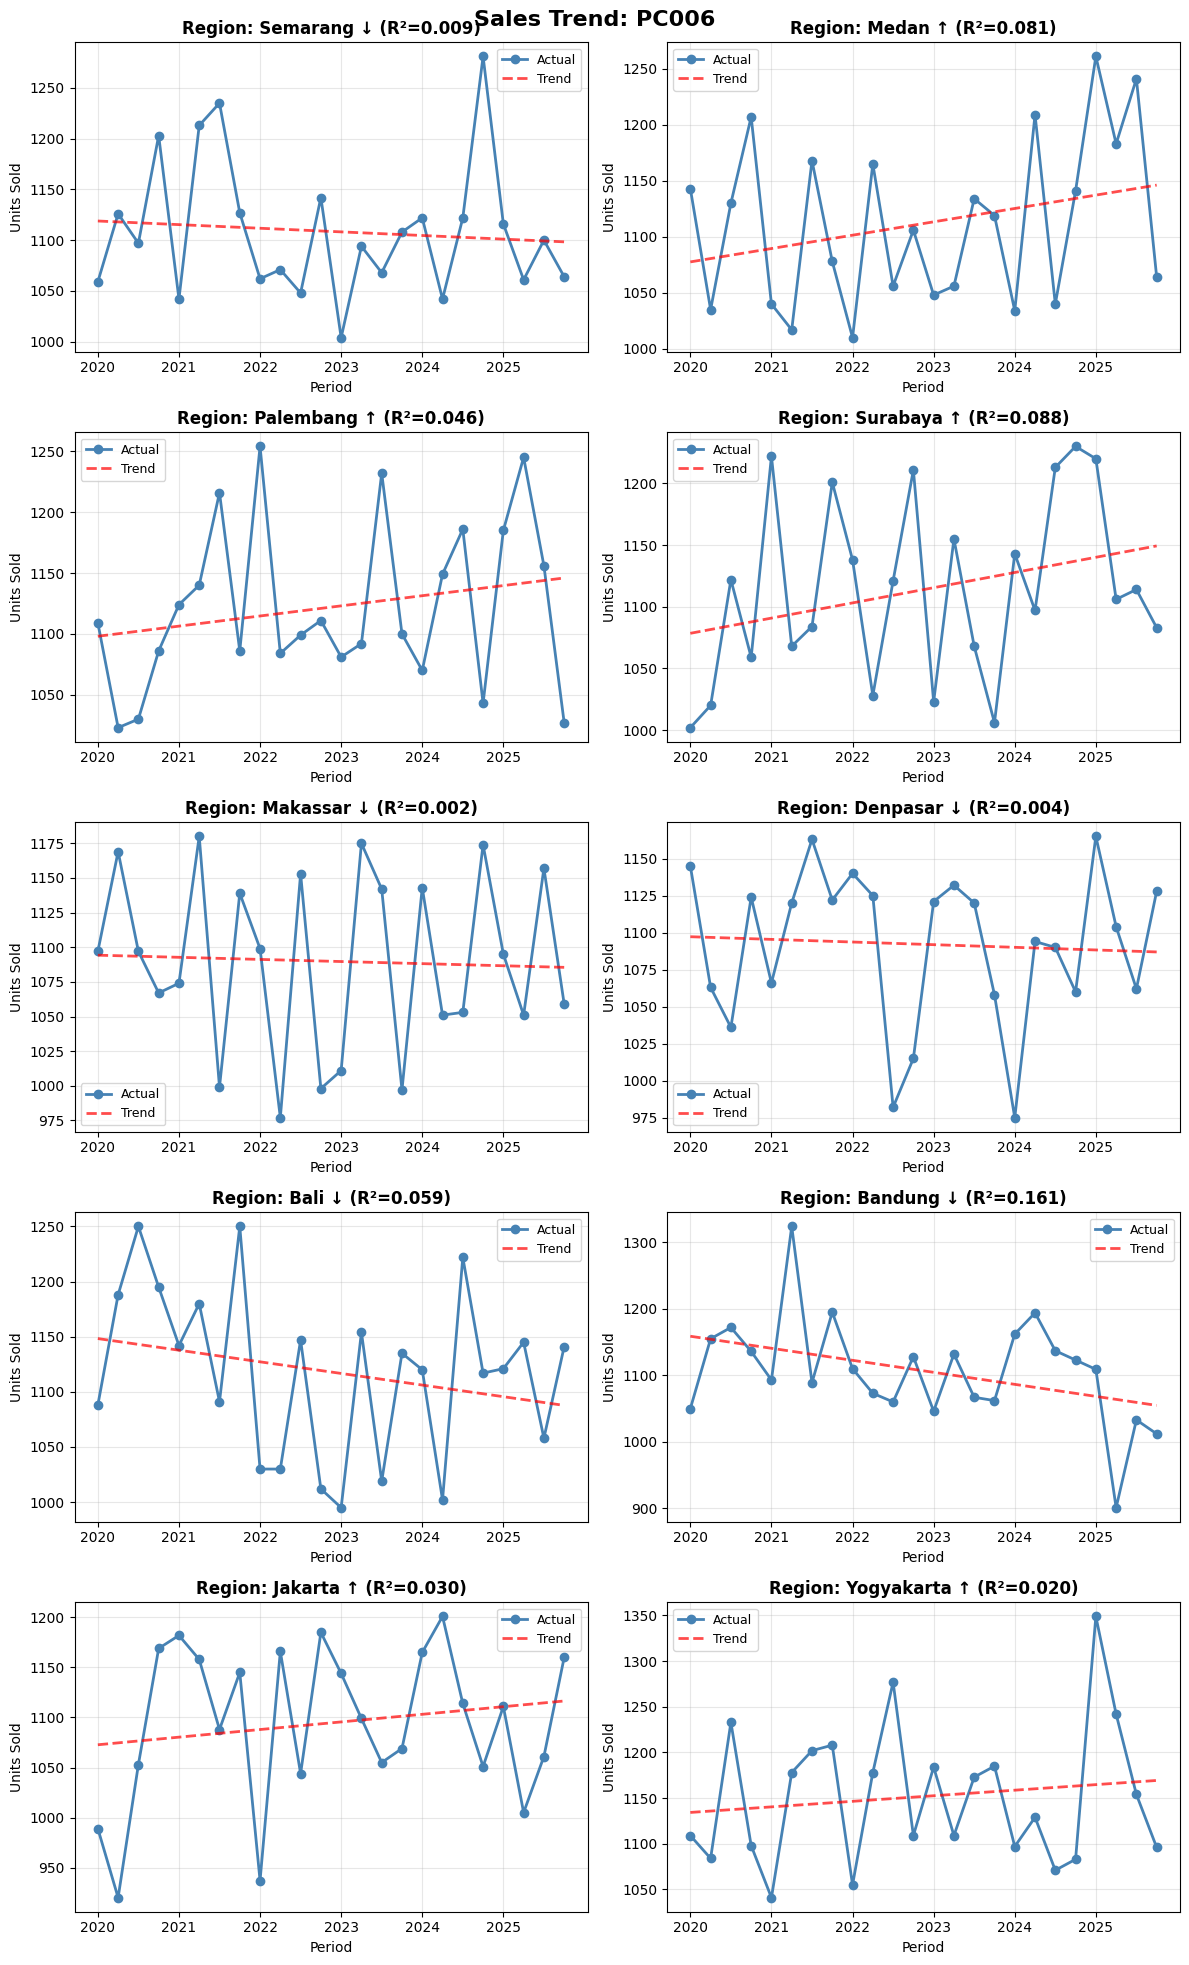

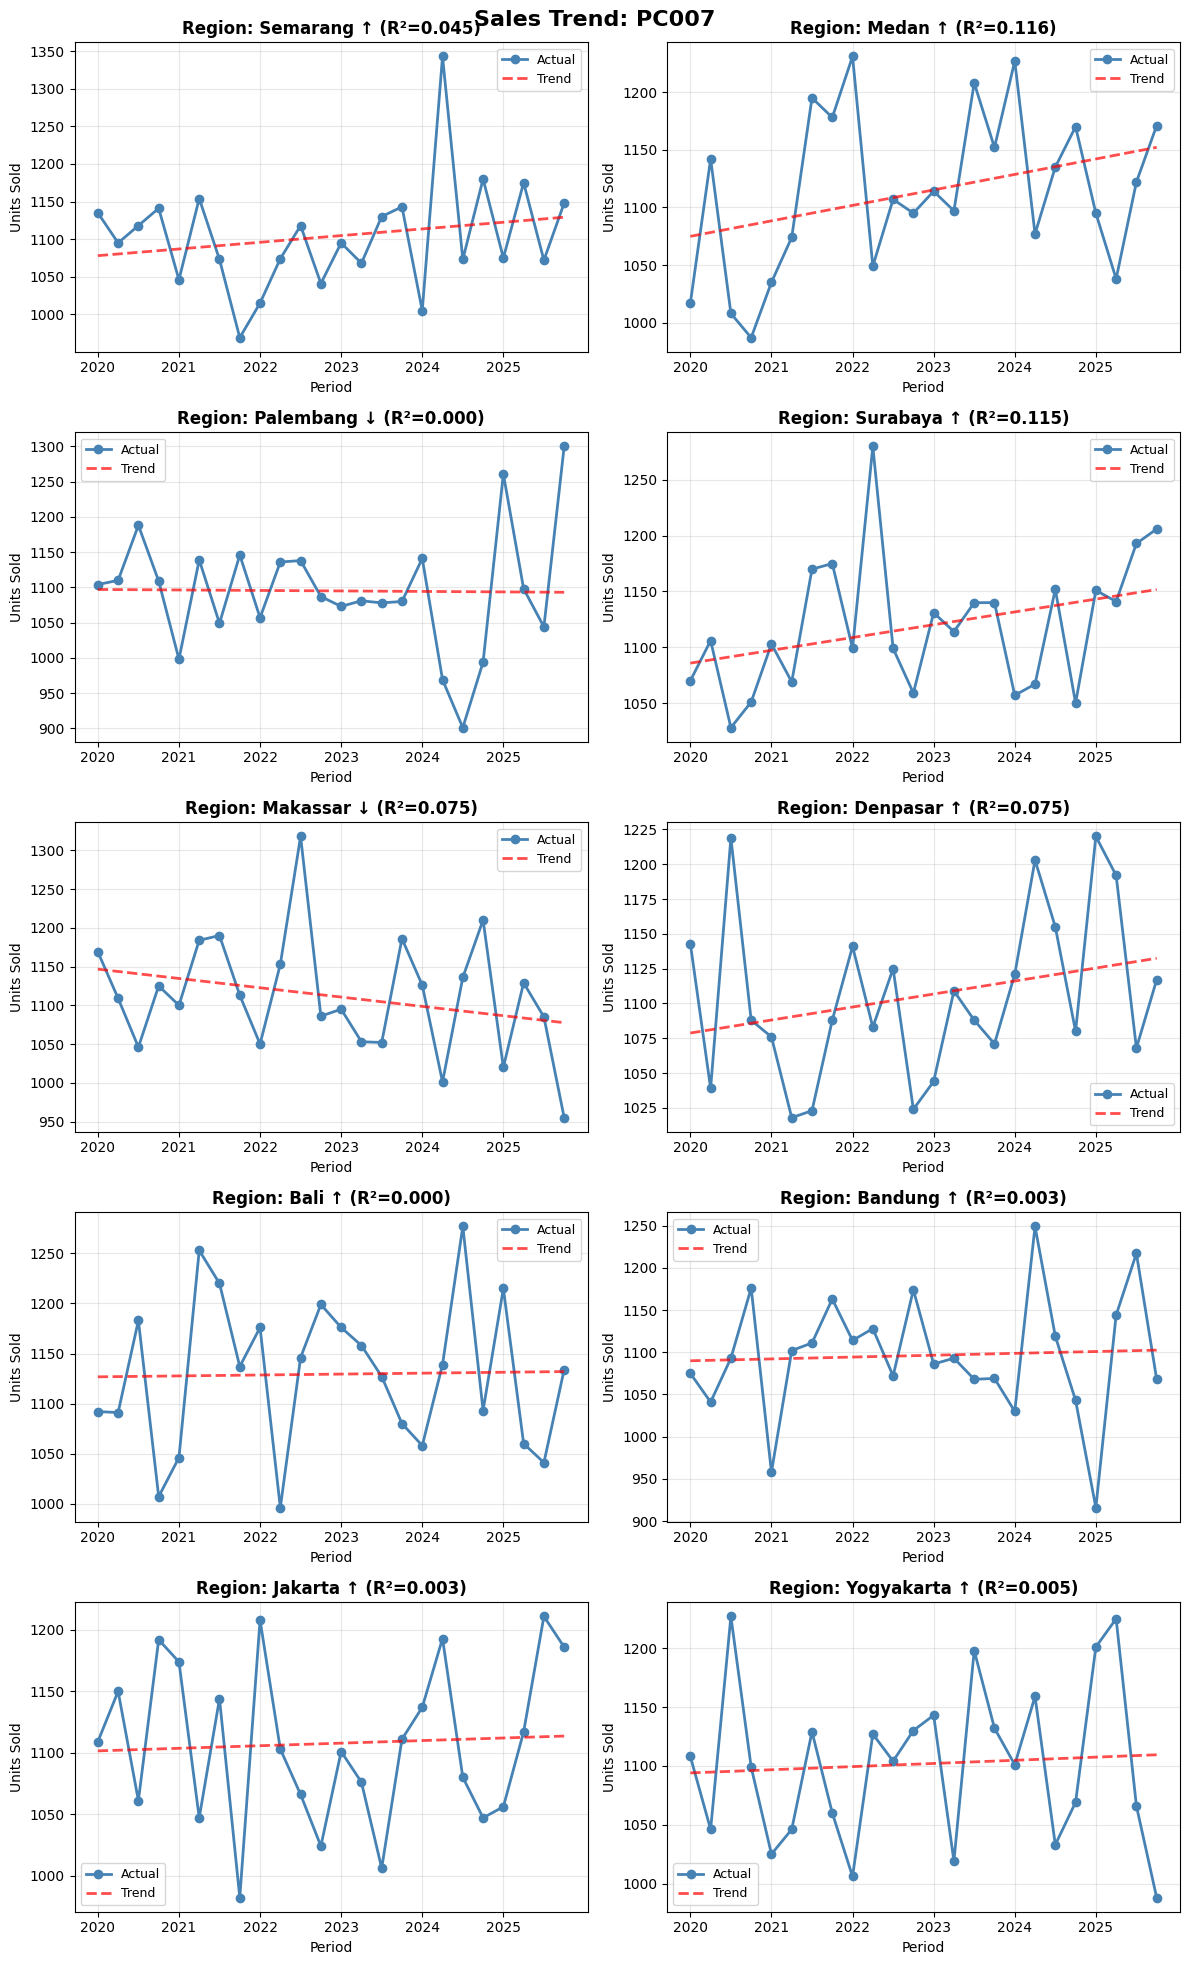

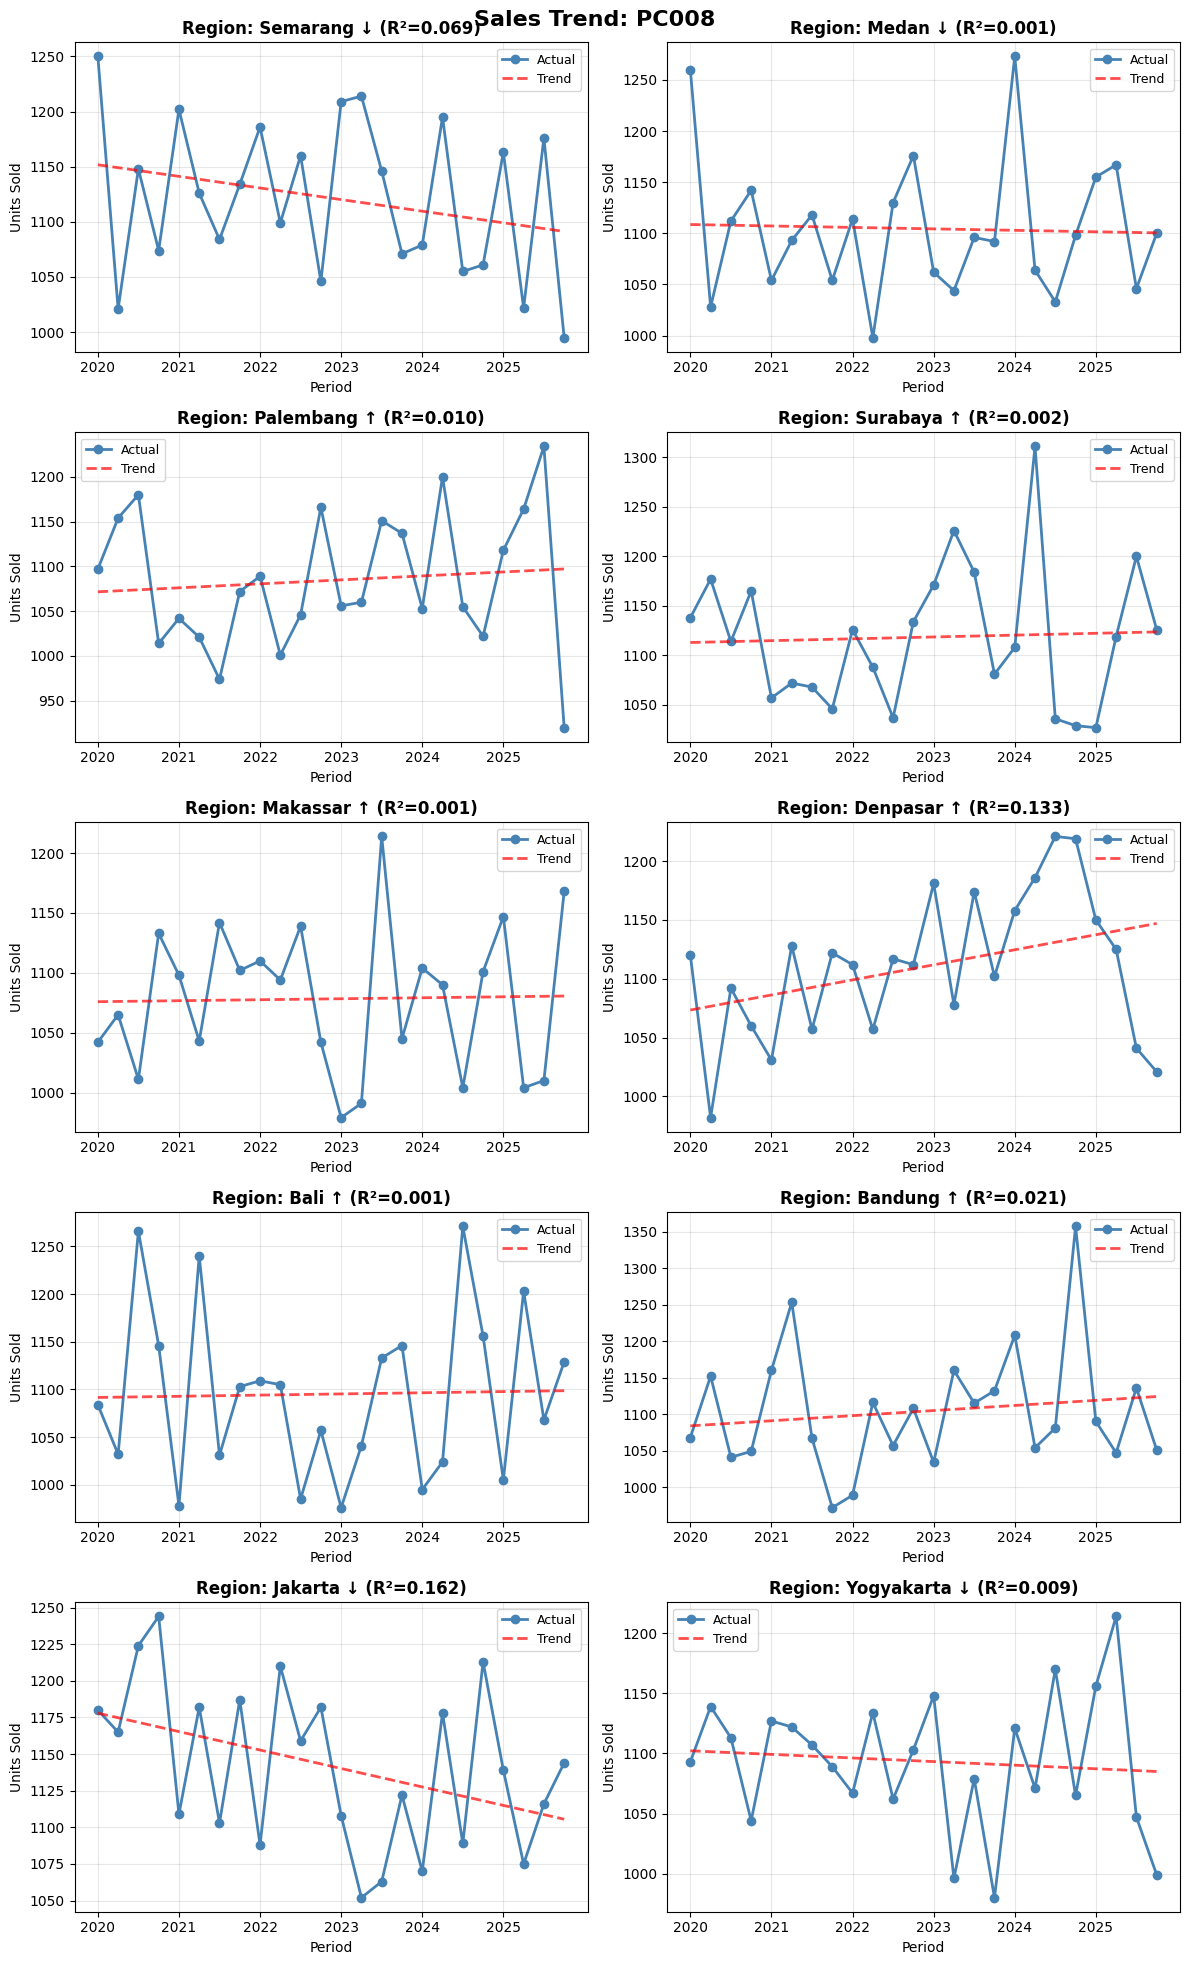

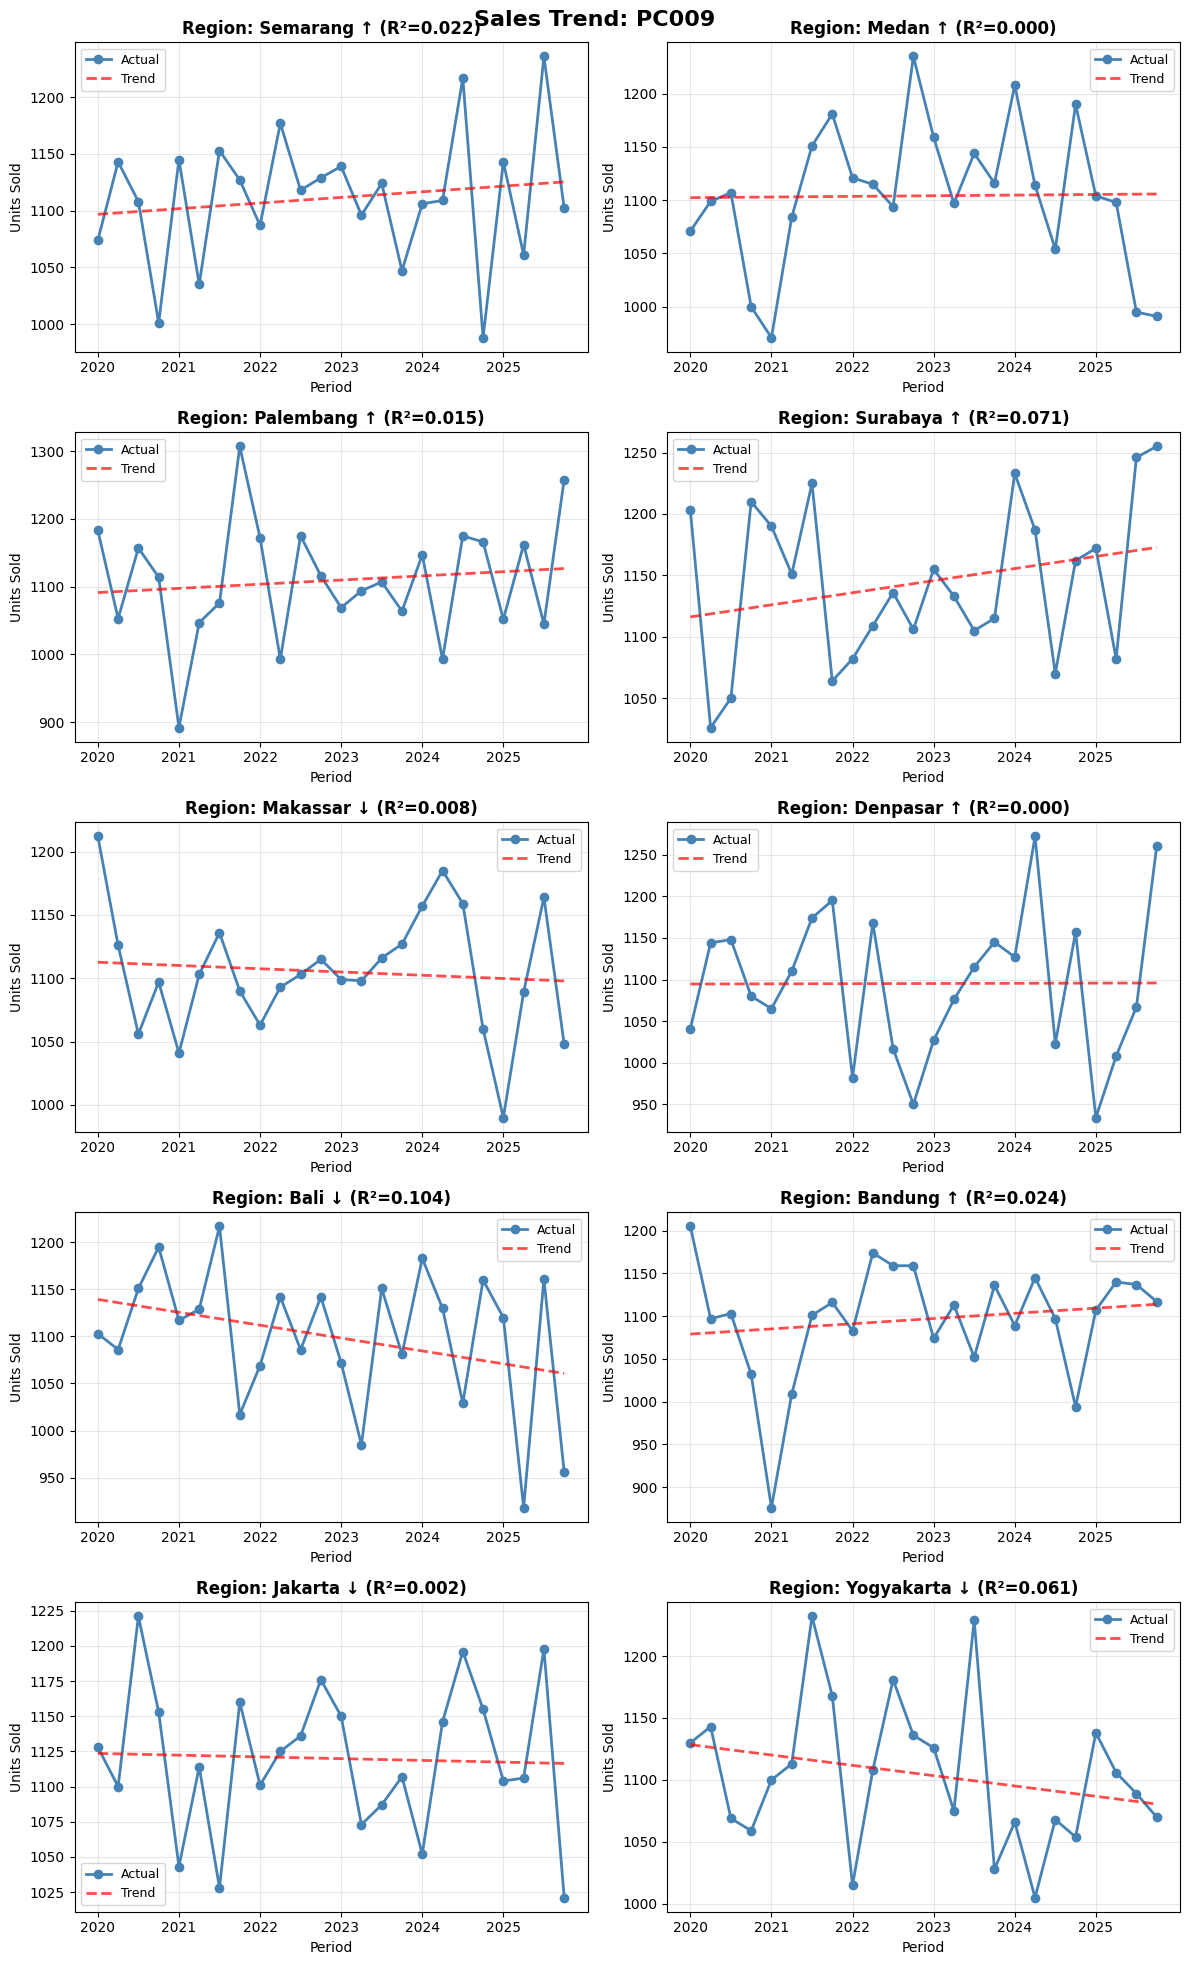

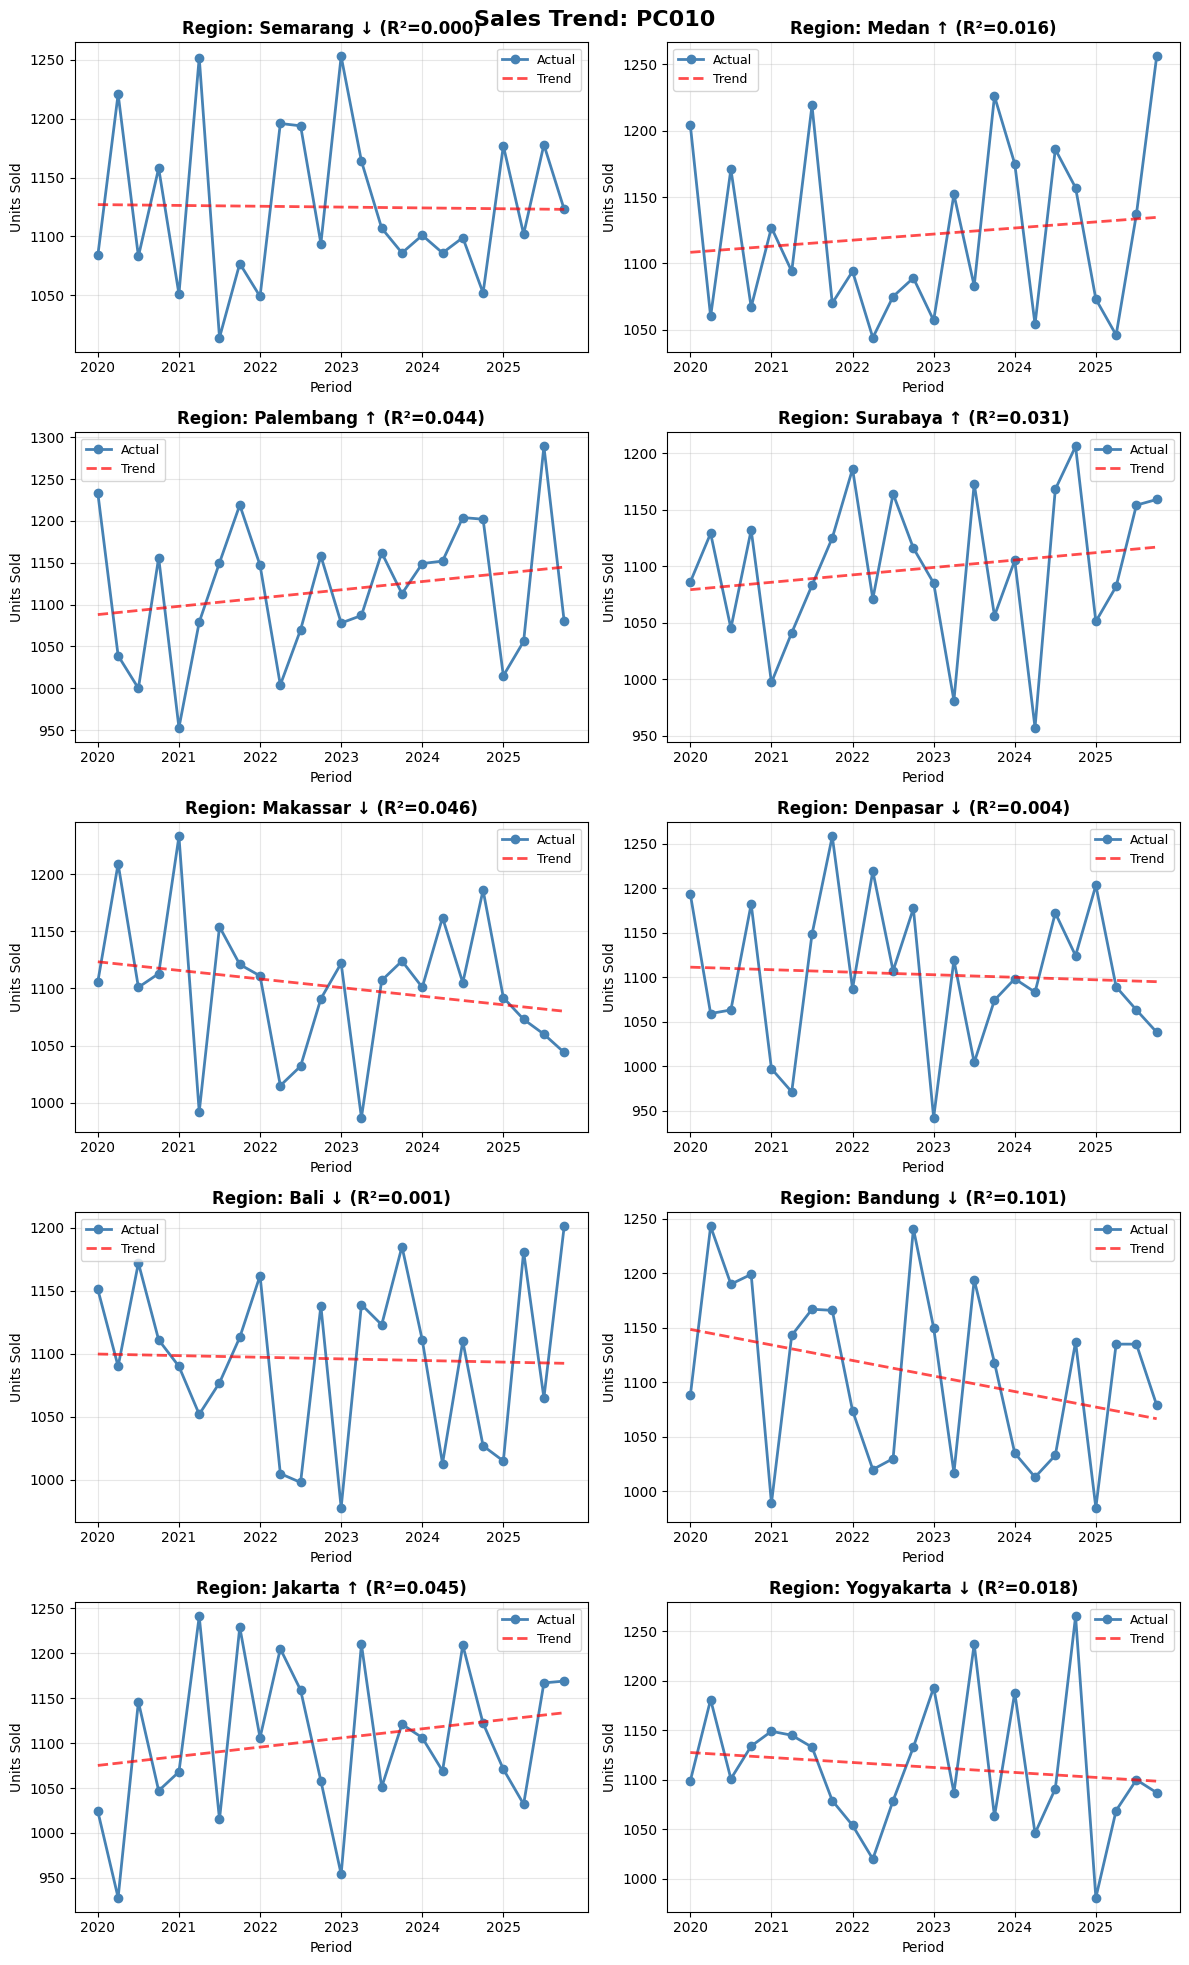

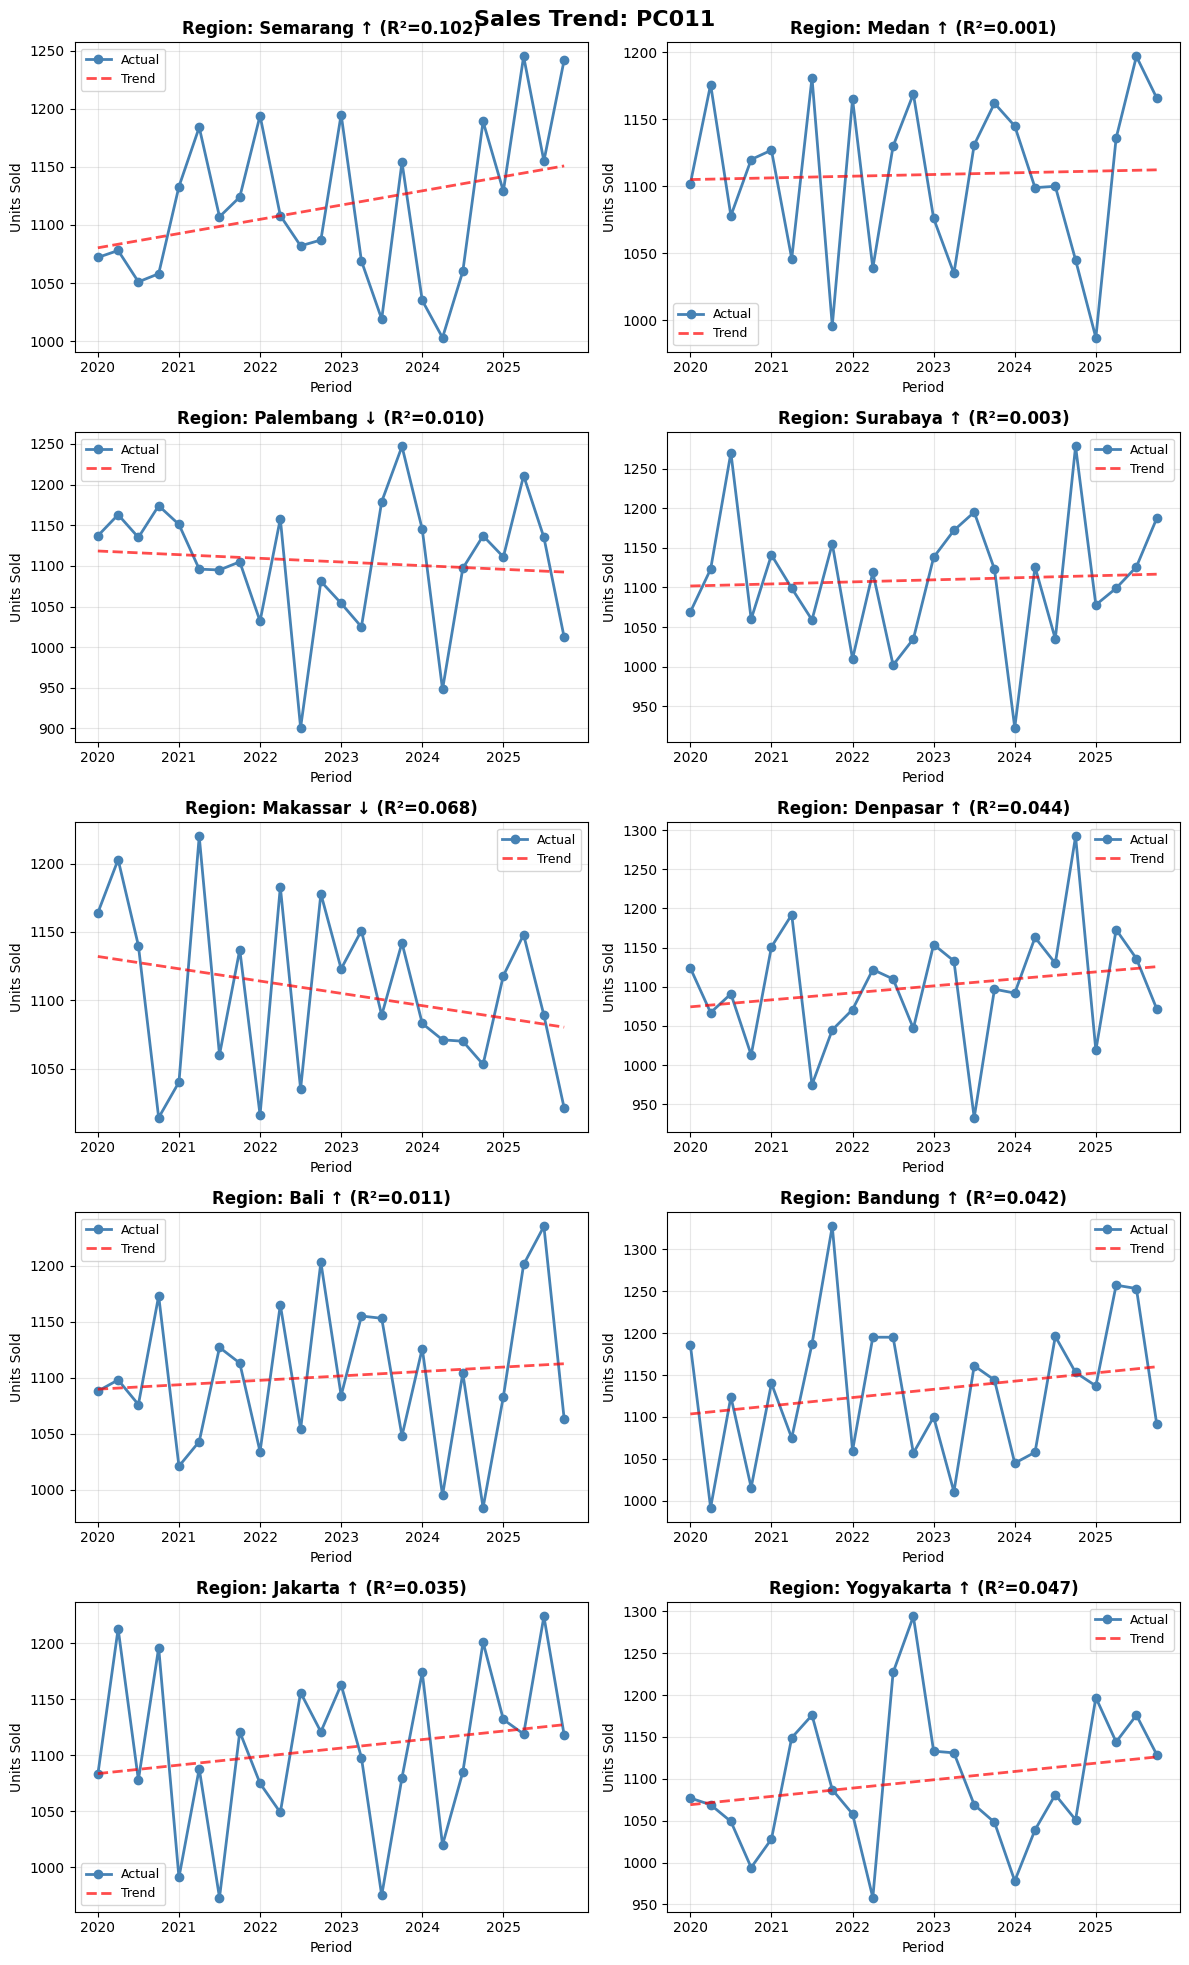

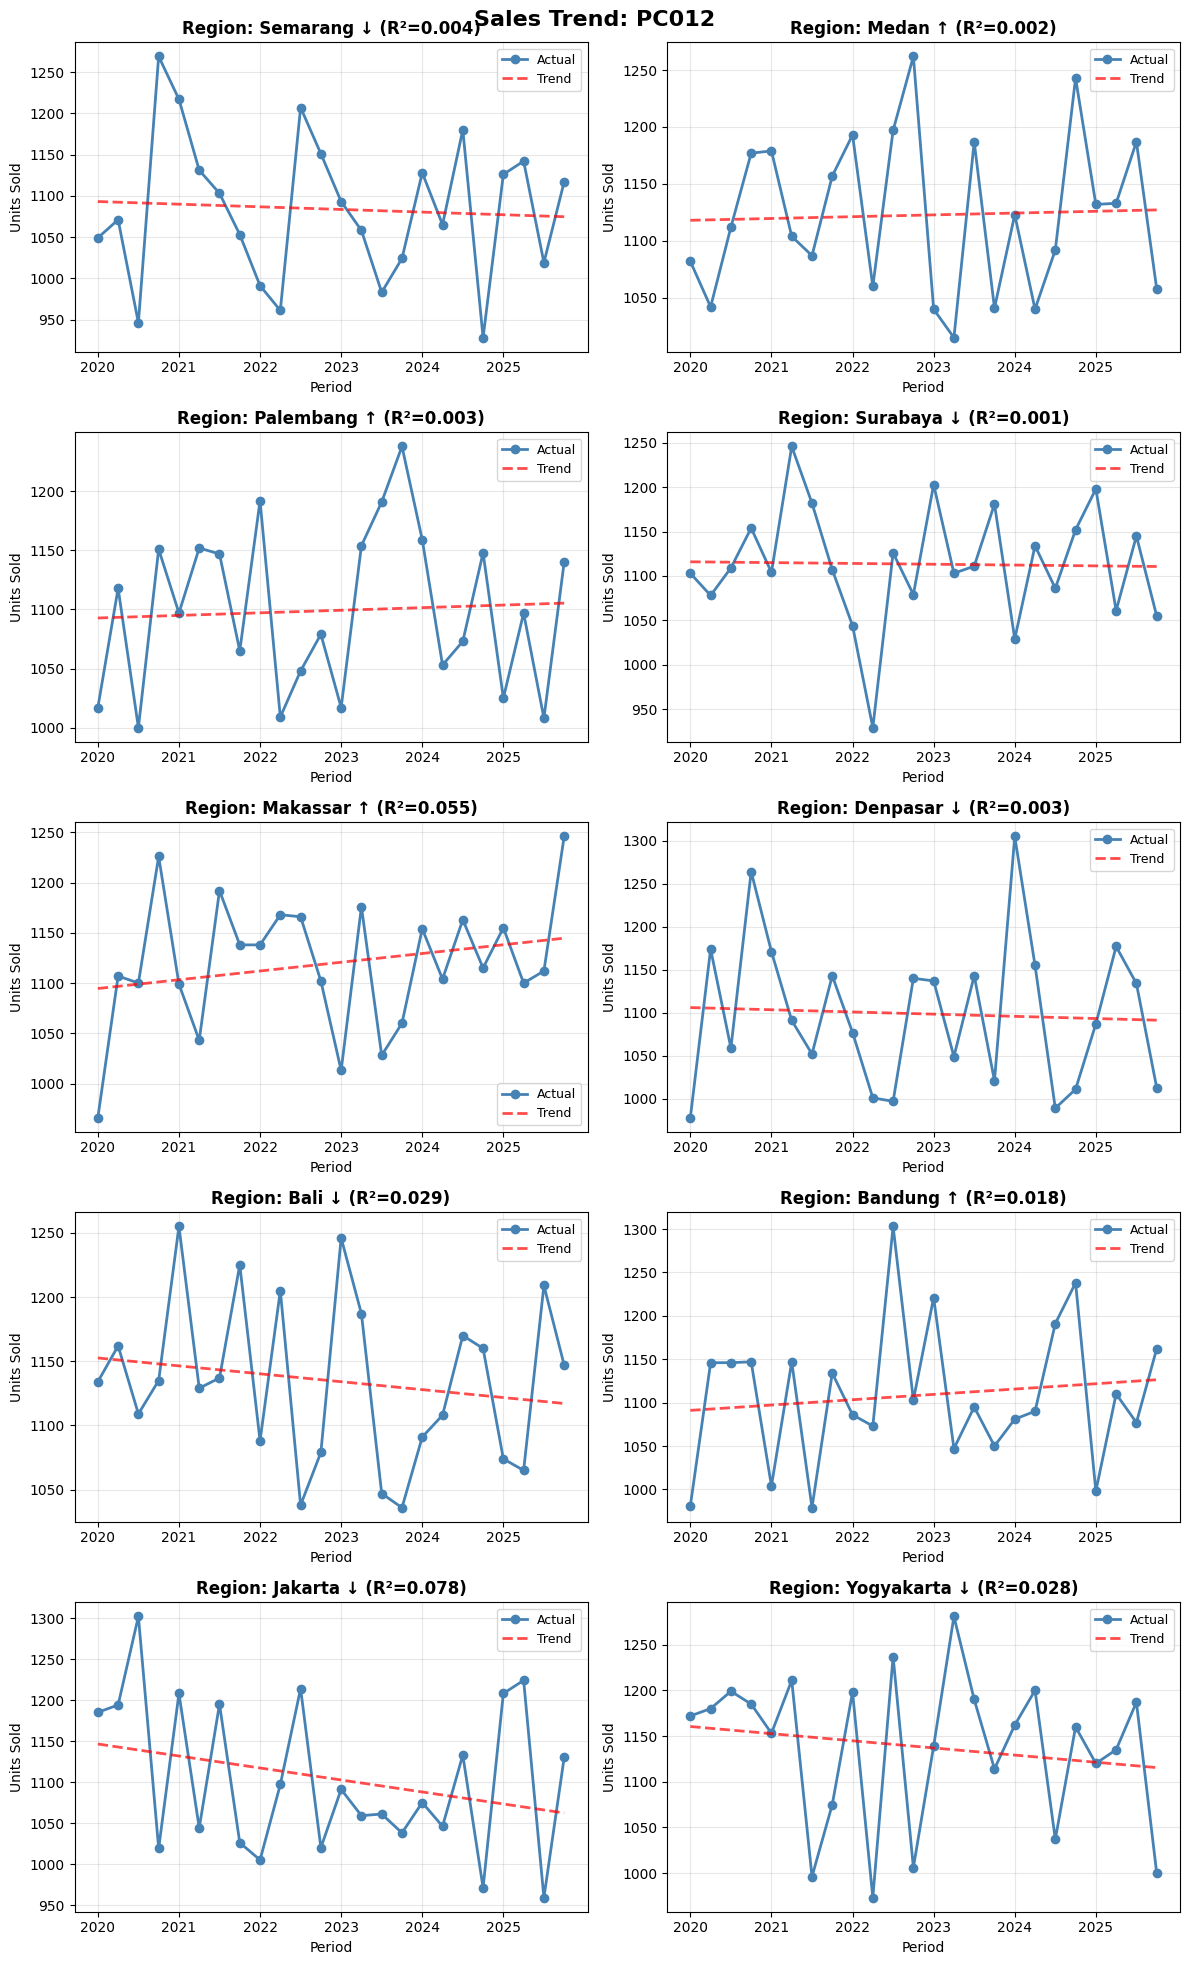

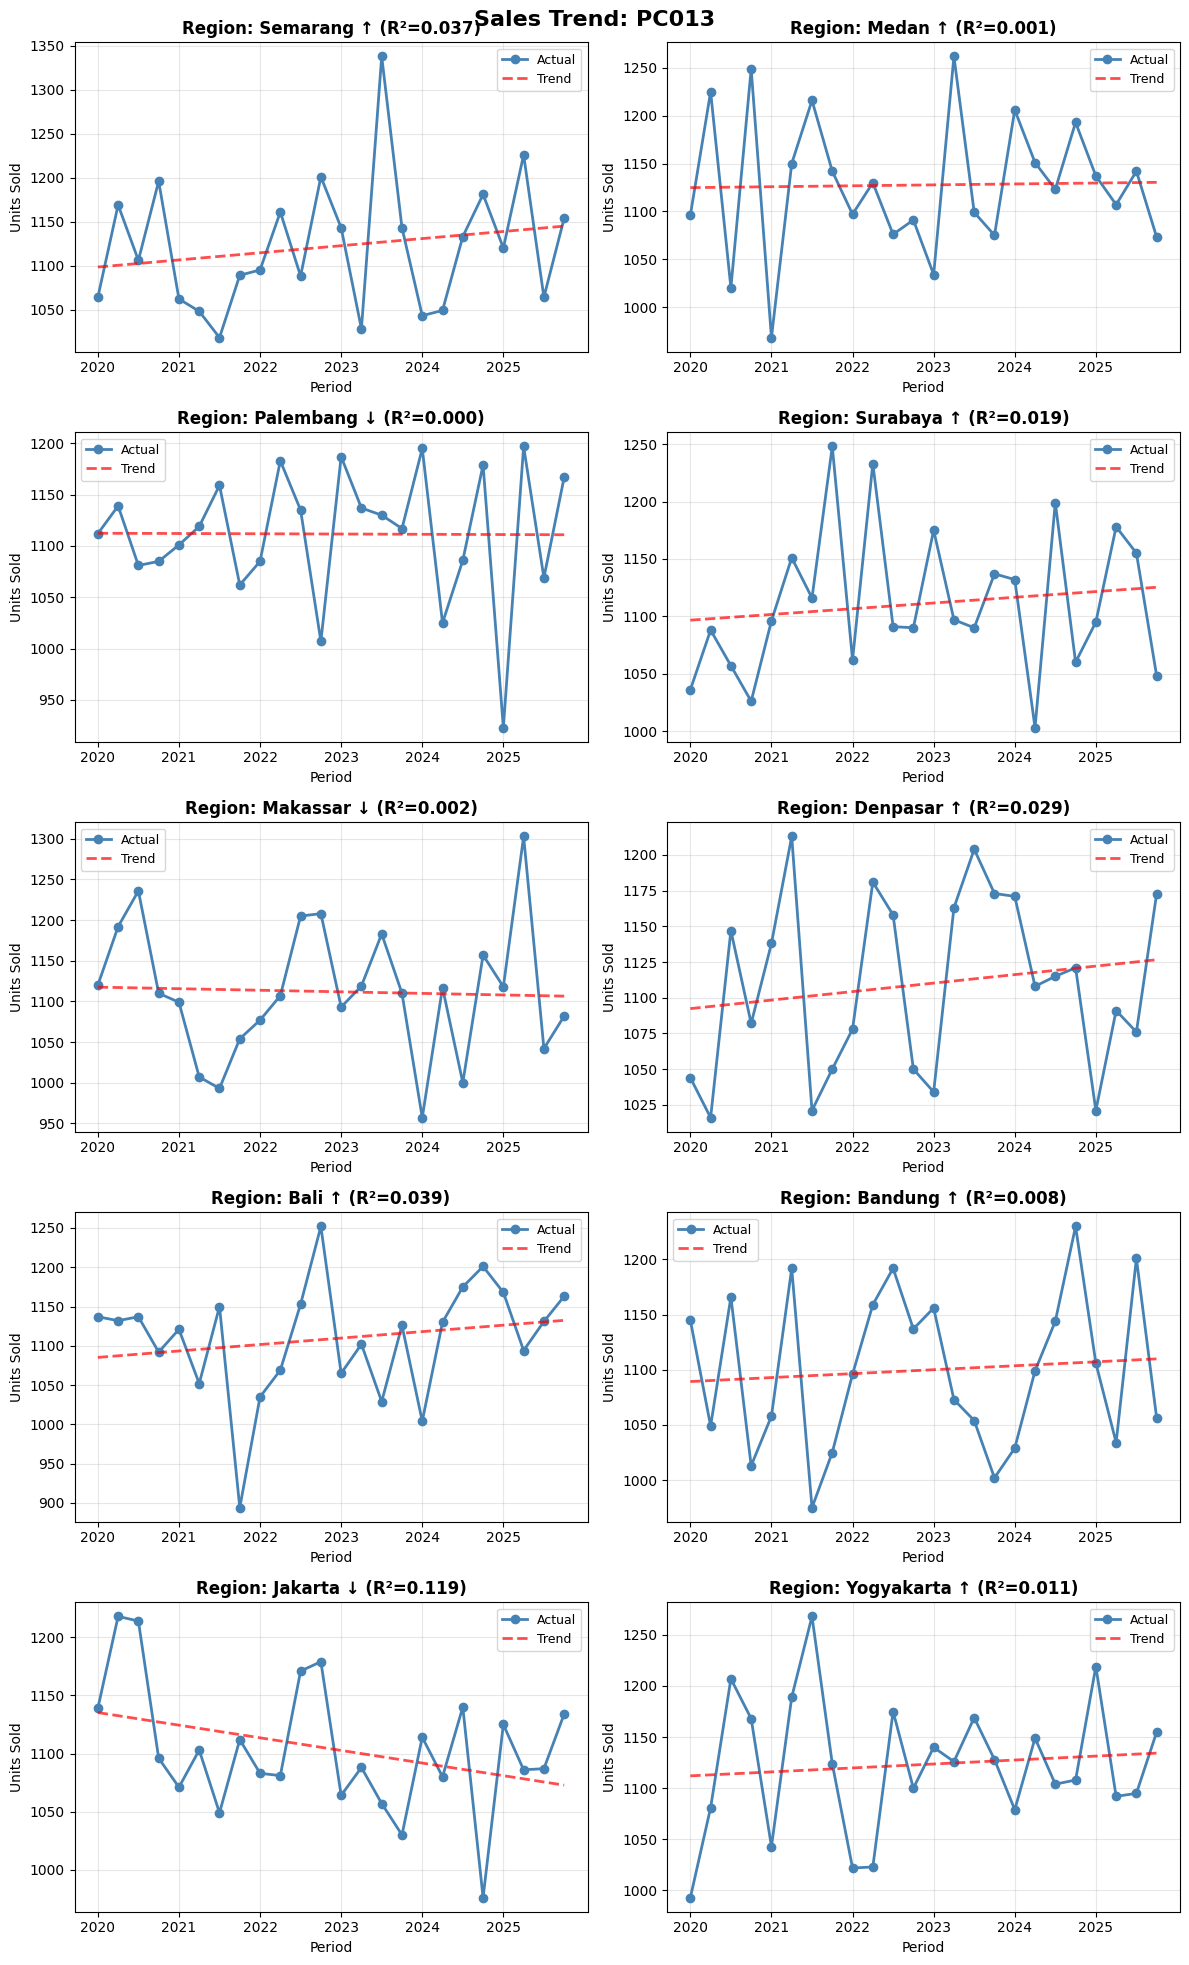

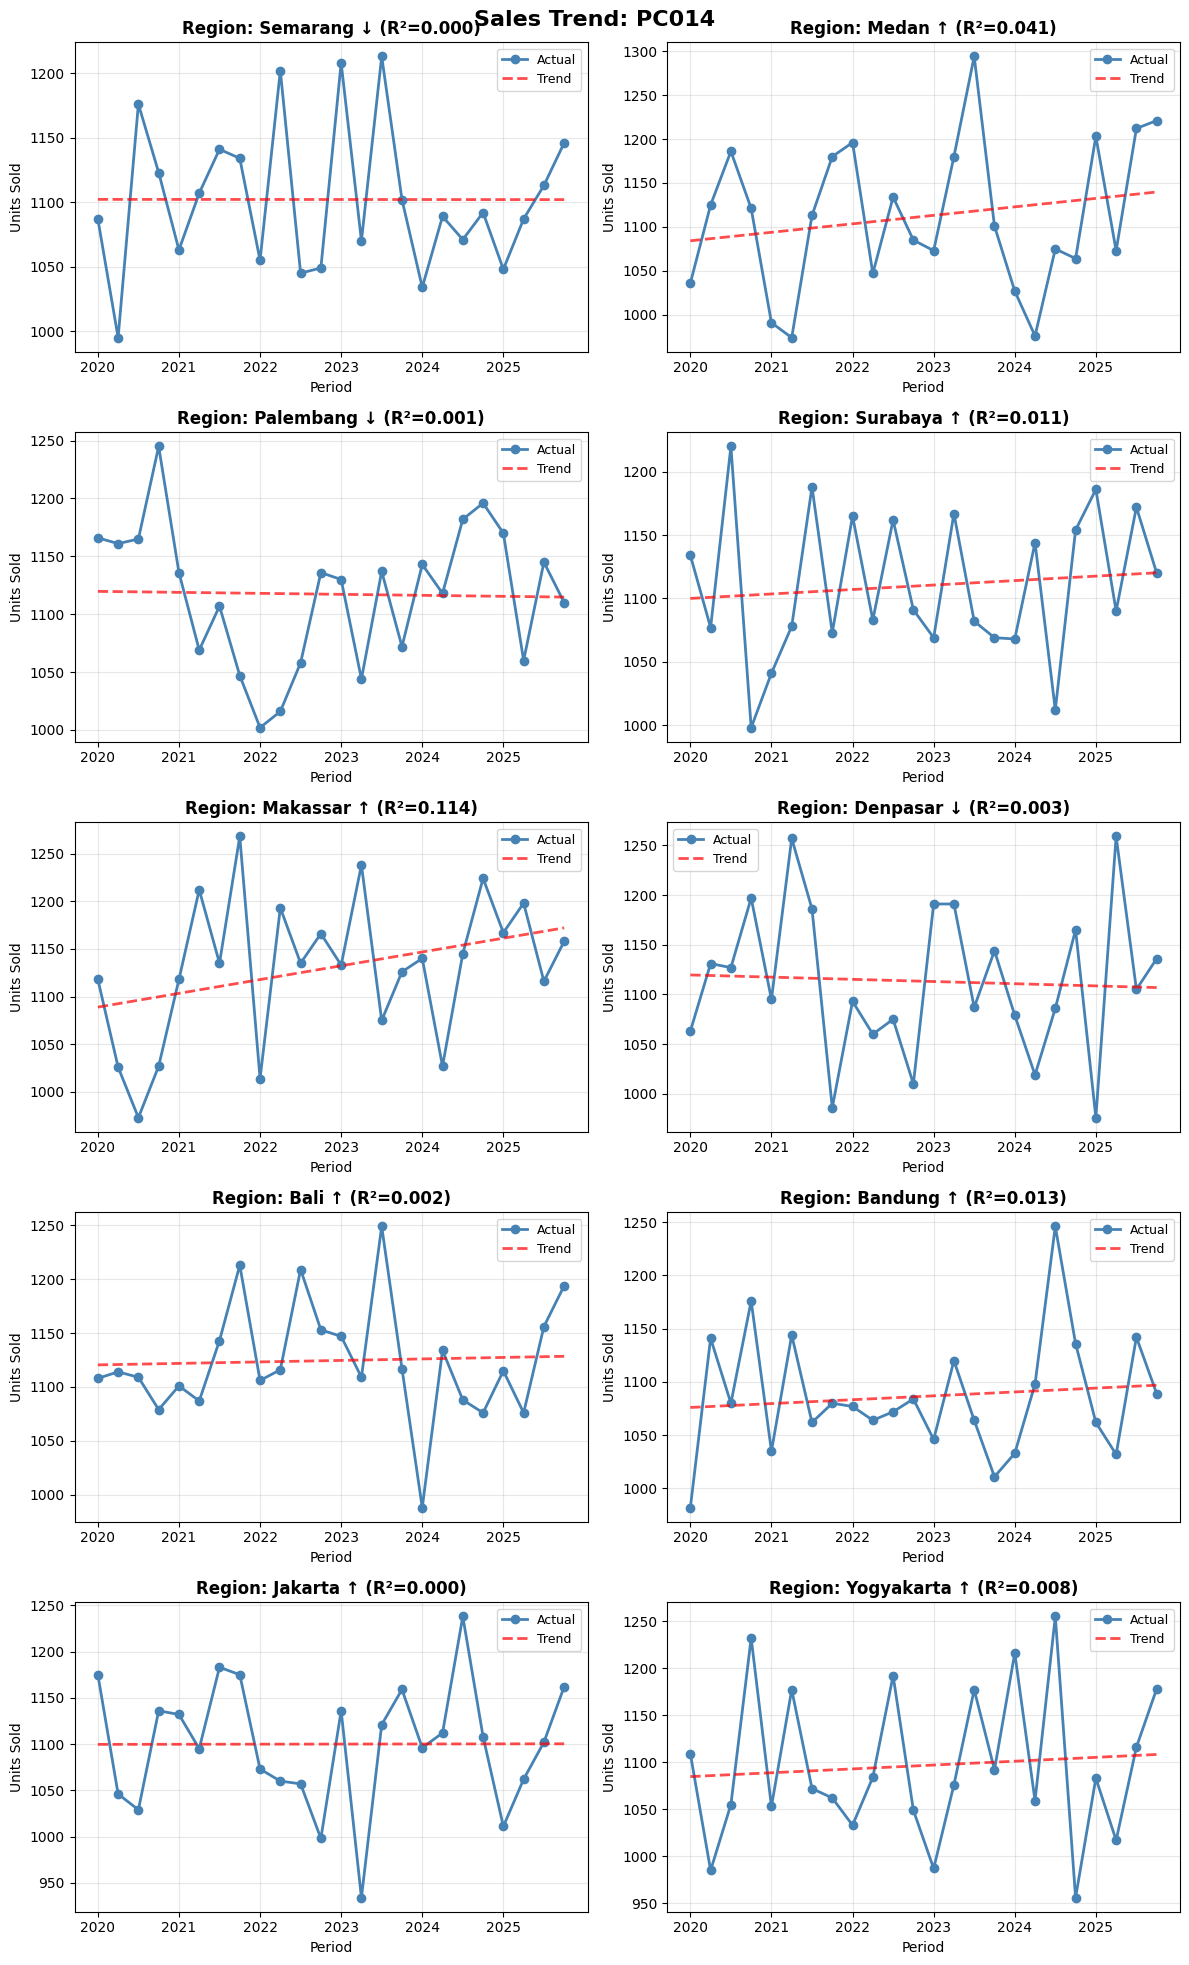

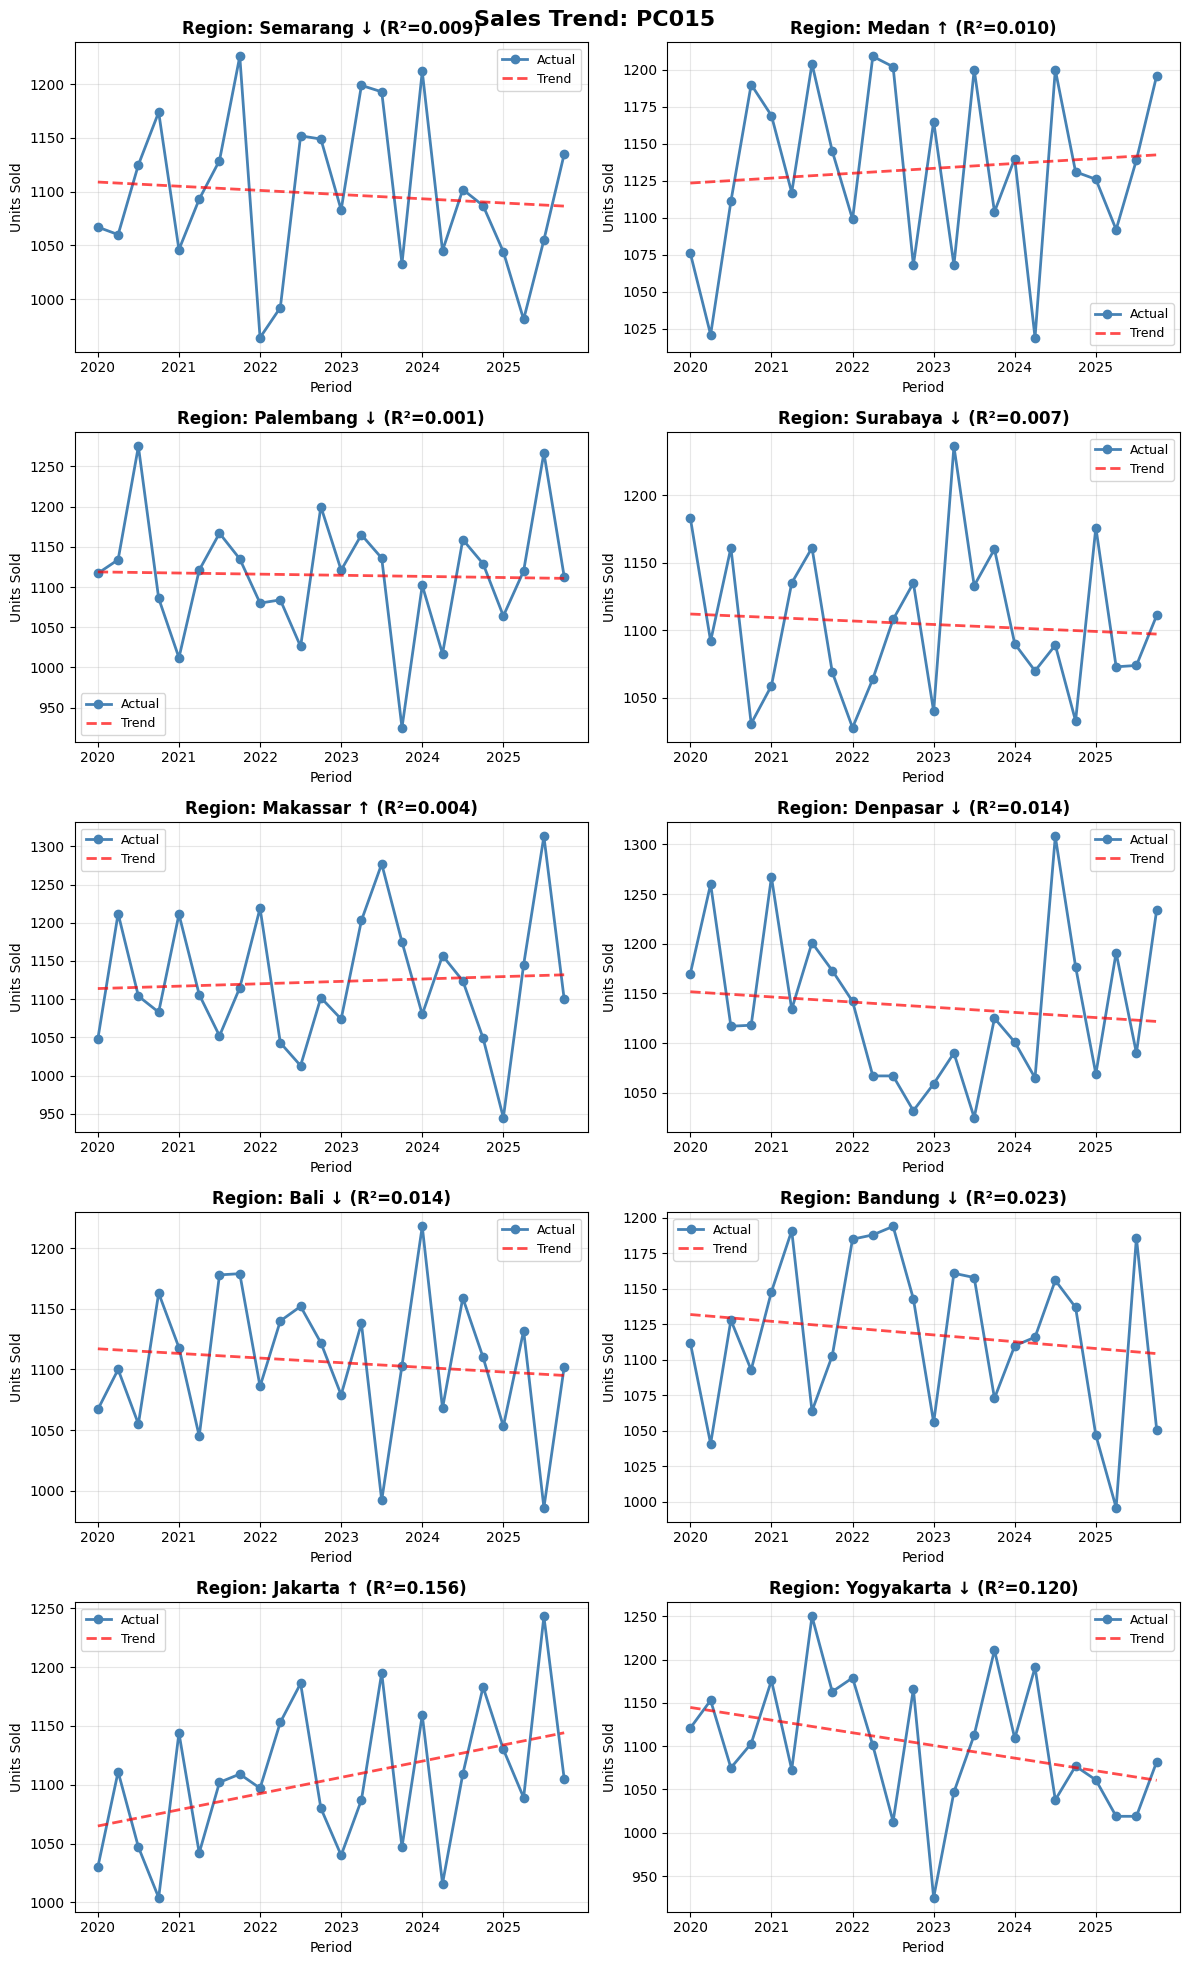

In [13]:
list_region = sales_data['region'].unique()

for product in product_id:
    regions_for_product = [r for r in list_region if (product, r) in unit_sold_region.index]
    
    if not regions_for_product:
        continue
    
    n_regions = len(regions_for_product)
    cols = 2  # 2 kolom per baris
    rows = math.ceil(n_regions / cols)

    fig, ax = plt.subplots(rows, cols, figsize=(12, 4*rows))
    fig.suptitle(f'Sales Trend: {product}', fontsize=16, fontweight='bold')

    if n_regions > 1:
        ax = ax.flatten()
    else:
        ax = [ax]

    for i, region in enumerate(regions_for_product):
        data = unit_sold_region.loc[(product, region)]
        
        x = np.arange(len(data))
        y = data.values
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        line = slope * x + intercept
        
        ax[i].plot(x, y, marker='o', linewidth=2, markersize=6, label='Actual', color='steelblue')
        
        ax[i].plot(x, line, '--', linewidth=2, color='red', alpha=0.7, label='Trend')
        
        trend_direction = "↑" if slope > 0 else "↓" if slope < 0 else "→"
        ax[i].set_title(f'Region: {region} {trend_direction} (R²={r_value**2:.3f})', 
                        fontsize=12, fontweight='bold')
        ax[i].set_xlabel('Period')
        ax[i].set_ylabel('Units Sold')
        ax[i].grid(True, alpha=0.3)
        ax[i].legend(loc='best', fontsize=9)
        
        periods = data.index.astype(str)
        years = [p[:4] for p in periods]

        year_indices = []
        year_labels = []
        seen_years = set()
        for idx, year in enumerate(years):
            if year not in seen_years:
                year_indices.append(idx)
                year_labels.append(year)
                seen_years.add(year)
        
        ax[i].set_xticks(year_indices)
        ax[i].set_xticklabels(year_labels, rotation=0)

    for j in range(n_regions, len(ax)):
        fig.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show()

### Mann Kendall Test

PC007 memiliki nilai P-Value yang paling mendekati signifikan dengan nilai 0.096 dan memiliki nilai Tau sebesar 0.246 dan terbesar diantara yang lain, dari dua nilai tersebut dapat disimpulkan adanya tren positif namun belum terlalu signifikan secara statistik,
tren naik ini dapat didorong dengan melakukan campaign marketing karena sebelumnya tidak pernah ada marketing untuk produk PC007.


In [14]:
mk_test_data = dict(tuple(sales_sum.groupby("product_id", sort=False)))

for ids in product_id:
    result = mk.original_test(mk_test_data[ids]['units_sold'])
    print(f"\n=== Product ID: {ids} ===")
    print(f"Trend Direction : {result.trend}")
    print(f"P-Value         : {result.p}")
    print(f"Tau             : {result.Tau}")
    print(f"S Statistic     : {result.s}")
    print(f"Variance S      : {result.var_s}")
    print(f"Z-Statistic     : {result.z}")
    print(f"Hypothesis H0   : {'Reject' if result.h else 'Fail to Reject'} (trend {'ada' if result.h else 'tidak ada'})")


=== Product ID: PC001 ===
Trend Direction : no trend
P-Value         : 0.4419310120112123
Tau             : 0.11594202898550725
S Statistic     : 32.0
Variance S      : 1625.3333333333333
Z-Statistic     : 0.7689364932156956
Hypothesis H0   : Fail to Reject (trend tidak ada)

=== Product ID: PC002 ===
Trend Direction : no trend
P-Value         : 0.6024416860423838
Tau             : -0.07971014492753623
S Statistic     : -22.0
Variance S      : 1625.3333333333333
Z-Statistic     : -0.5208924631461164
Hypothesis H0   : Fail to Reject (trend tidak ada)

=== Product ID: PC003 ===
Trend Direction : no trend
P-Value         : 0.823349012100195
Tau             : 0.036231884057971016
S Statistic     : 10.0
Variance S      : 1625.3333333333333
Z-Statistic     : 0.22323962706262132
Hypothesis H0   : Fail to Reject (trend tidak ada)

=== Product ID: PC004 ===
Trend Direction : no trend
P-Value         : 0.28615732110495795
Tau             : 0.15942028985507245
S Statistic     : 44.0
Variance S  

Untuk memudahkan perbandingan peforma semua produk, matriks di bawah ini menunjukkan posisi setiap produk berdasarkan indeks stabilitas dan juga rata - rata pertumbuhan penjualan, dimana di kuadran kanan atas adalah bagian dimana produk memiliki pertumbuhan yang stabil, di kuadran kanan bawah adalah bagian dimana produk memiliki penurunan yang stabil, dikuadran kiri atas adalah bagian dimana produk memiliki pertumbuhan yang baik namun tidak konsisten yang bisa jadi karena bersifat musiman, terakhir di kuadran kiri bawah adalah bagian dimana produk memiliki pertumbuhan yang buruk dan juga penjualan yang tidak stabil.

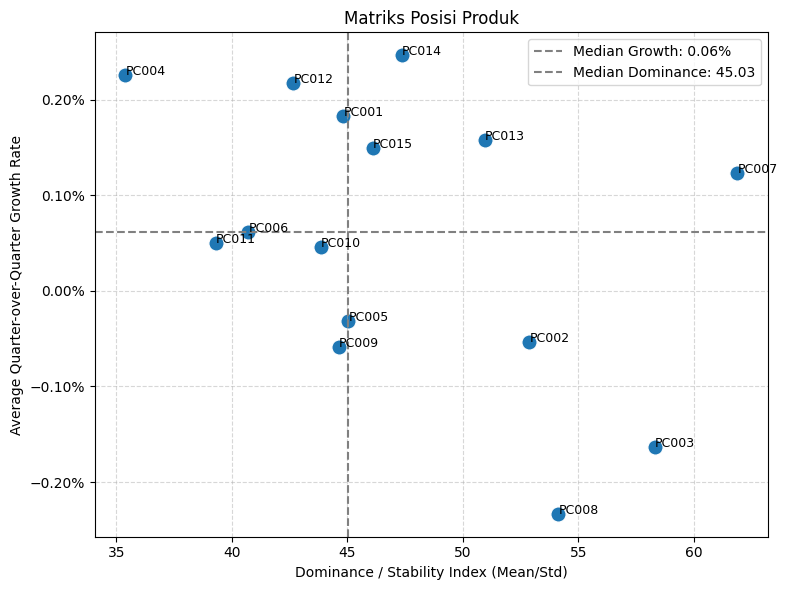

In [ ]:
sales_sum = sales_sum.sort_values(['product_id', 'month'])
sales_sum['pct_change'] = sales_sum.groupby('product_id')['units_sold'].pct_change()
growth = sales_sum.groupby('product_id')['pct_change'].mean().to_frame('growth_rate')
stats = sales_sum.groupby('product_id')['units_sold'].agg(['mean', 'std'])
stats['dominance_index'] = stats['mean'] / stats['std']
stats = stats.join(growth)

median_dom = stats['dominance_index'].median()
median_growth = stats['growth_rate'].median()

plt.figure(figsize=(8,6))
sns.scatterplot(data=stats, x='dominance_index', y='growth_rate', s=120)

plt.axhline(median_growth, color='gray', linestyle='--', label=f'Median Growth: {median_growth:.2%}')
plt.axvline(median_dom, color='gray', linestyle='--', label=f'Median Dominance: {median_dom:.2f}')

for i, txt in enumerate(stats.index):
    plt.text(stats['dominance_index'].iloc[i]+0.02, 
             stats['growth_rate'].iloc[i], txt, fontsize=9)

plt.title("Matriks Posisi Produk")
plt.xlabel("Dominance / Stability Index (Mean/Std)")
plt.ylabel("Average Quarter-over-Quarter Growth Rate")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

### Hasil dan Analisis

Dari data yang telah diolah dan diekstrak diatas kami memiliki beberapa kandidat untuk produk bintang yang memiliki peluang penjualan di masa depan yaitu produk PC007, PC013, PC014. Dari ketiga produk tersebut berdasarkan tren garis regresi ketiganya memiliki nilai yang positif menaik walaupun nilai PC013 masih dibawah PC004 dan PC011, kemudian PC007 belum pernah melakukan marketing yang berarti potensinya masih bisa di naikkan, tidak seperti PC013 yang sudah 1x marketing dan juga PC014 yang sudah 3x marketing.

Dalam segi penyumbang pendapatan PC007 dan PC014 merupakan 2 produk dengan pendapatan tertinggi, sementara PC013 masih berada beberapa peringkat di bawahnya.

Dari performa penjualan tiap region PC007 sebagian besar memiliki performa positif atau stabil di seluruh region kecuali makassar, hal ini dapat menjadi saran region untuk dilakukan marketing, PC013 juga memiliki performa serupa dengan PC007 dimana region yang memiliki performa buruk hanya di jakarta sehingga marketing bisa lebih difokuskan ke sini, terakhir untuk PC014 keseluruhan performa di setiap region positif dan stabil.

Dari hasil Mann-Kendall test, ketiga produk tidak memiliki tren yang cukup signifikan namun PC007 memiliki nilai P-Value terendah diantar ketiganya sebesar 0.096 yang berarti tren yang terbentuk memiliki kemungkinan 9.6% merupakan tren kebetulan berbeda dengan PC013 yang memiliki nilai 0.53 yang berarti kemungkinan tren tersebut kebetulan sebesar 53% dan juga PC014 sebesar 0.25. Dari perspektif nilai tau PC007 memiliki nilai tau terbesar diantara ketiganya dengan nilai sebesar 0.24 yang berarti PC007 memiliki tren positif yang paling kuat, tidak seperti PC013 yang sudah mendekati 0 yang menandakan tren hampir tidak ada dan juga PC014 dengan nilai 0.14 yang berada di bawah PC007.

Dari posisi produk dalam matriks indeks stabilitas dan growth rate, PC007 merupakan produk yang paling stabil penjualannya dan juga memiliki pertumbuhan yang positif diatas median, PC014 memiliki pertumbuhan yang tinggi namun kurang stabil dalam penjualannya dibandingkan PC007 dan PC013, PC013 berada di antara keduanya namun posisi indeks stabilitasnya tetap jauh dari PC007.

### Kesimpulan

Dari hasil yang telah didapat PC007 terpilih menjadi produk bintang karena performa penjualannya yang berada diatas yang lain, termasuk penyumbang pendapatan kedua terbesar, memiliki basis pasar yang baik di hampir semua region, memiliki probabilitas false tren terendah dan kekuatan tren terkuat dari hasil uji Mann-Kendall dan juga memiliki stabilitas penjualan yang baik terhadap pertumbuhannya, ditambah fakta bahwa performa baik ini didapatkan tanpa adanya marketing, yang berarti masih ada ruang peningkatan yang banyak jika dilakukan marketing.